In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/occupational-stressjob-satisfaction-and-performance/Dataset.csv


# Step 1: Data Accessing and Loading

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/kaggle/input/occupational-stressjob-satisfaction-and-performance/Dataset.csv')

# Initial data inspection
print(df.head())
print(df.info())


   Age  Religion  Ethnicity  Marital status  Marriage period  No. of children  \
0    2         1          1               1                1                1   
1    2         1          1               1                2                1   
2    2         1          1               1                2                1   
3    3         1          1               2                1                2   
4    2         1          1               1                1                1   

   Educational level  Employment status  Working period  Household income  \
0                  6                  1               4                 7   
1                  6                  1               3                 4   
2                  6                  1               5                 7   
3                  5                  1               5                10   
4                  6                  1               3                 5   

   ...  JS33  JS34  JS35  JS36  JP1  JP2  JP3  JP4

# Step 2: Data Cleaning and Initial Inspection

In [3]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Convert integer-based categorical columns to categorical type
categorical_columns = [
    'Age', 'Religion', 'Ethnicity', 'Marital status', 'Marriage period', 
    'No. of children', 'Educational level', 'Employment status', 
    'Working period', 'Household income'
]

for col in categorical_columns:
    df[col] = df[col].astype('category')

# Convert the target column (Sperm Quality) to categorical
df['Sperm quality'] = df['Sperm quality'].astype('category')

# Confirm conversion
print(df.dtypes)


Missing values:
 Age                0
Religion           0
Ethnicity          0
Marital status     0
Marriage period    0
                  ..
JP2                0
JP3                0
JP4                0
JP5                0
JP6                0
Length: 94, dtype: int64
Age                category
Religion           category
Ethnicity          category
Marital status     category
Marriage period    category
                     ...   
JP2                   int64
JP3                   int64
JP4                   int64
JP5                   int64
JP6                   int64
Length: 94, dtype: object


# Step 3: Exploratory Data Analysis (EDA)

# 3.1 Data Distribution


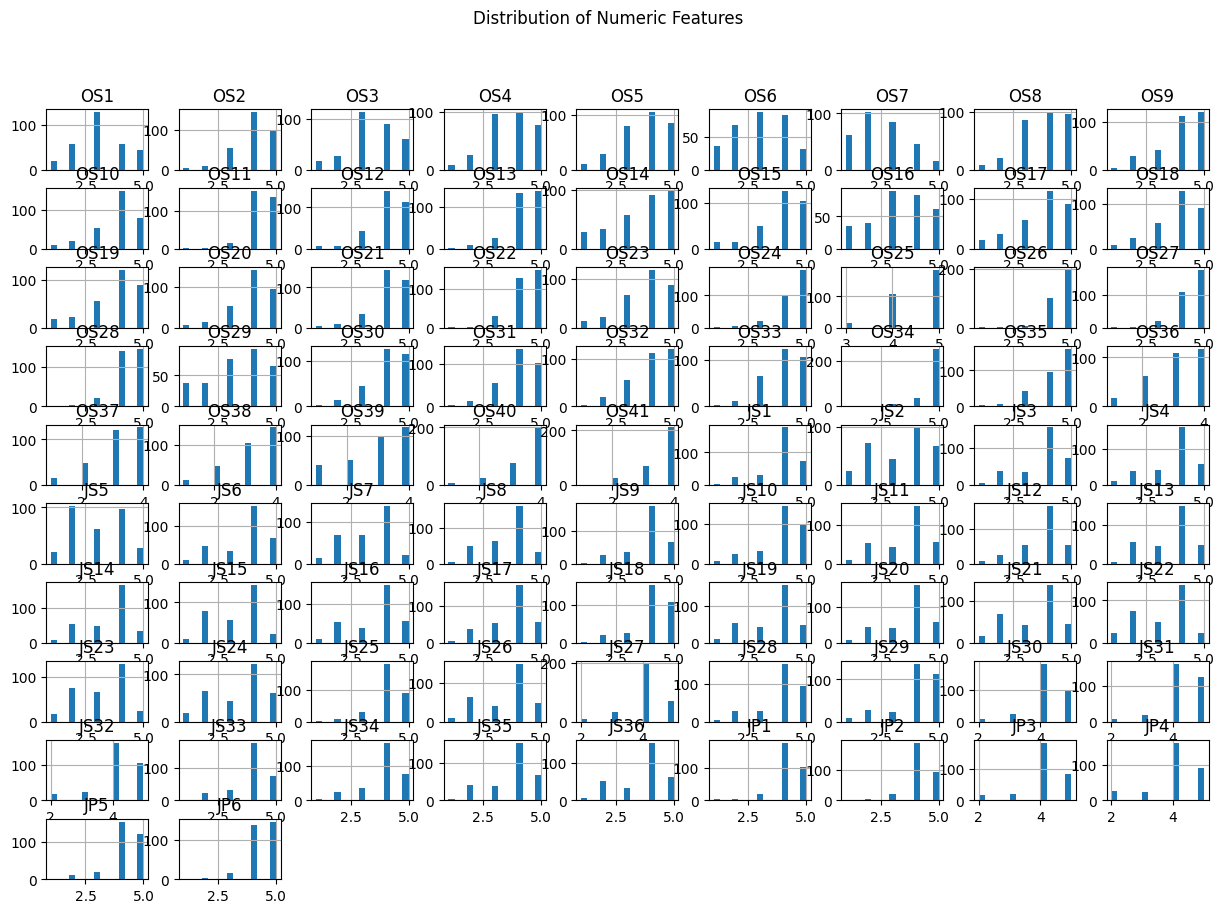

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


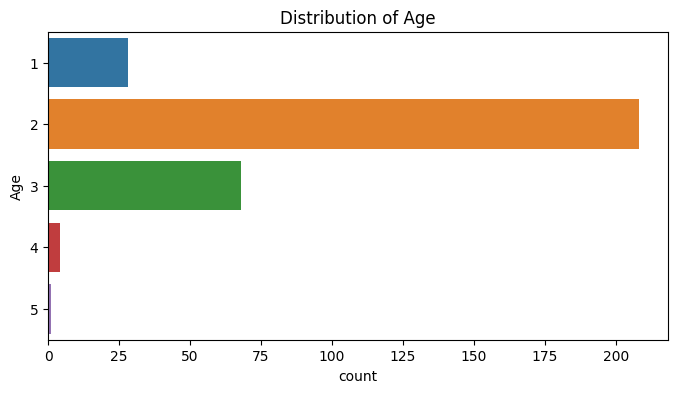

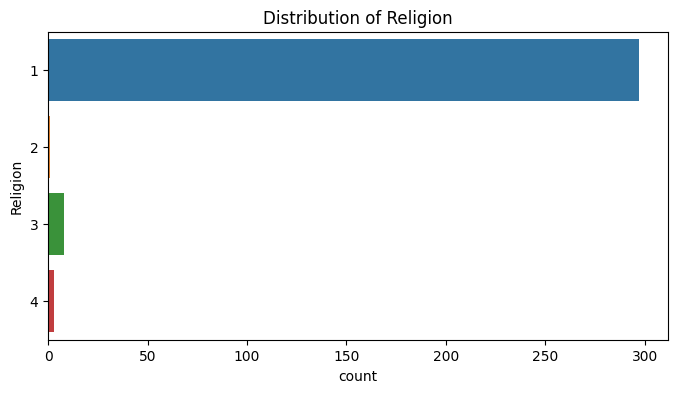

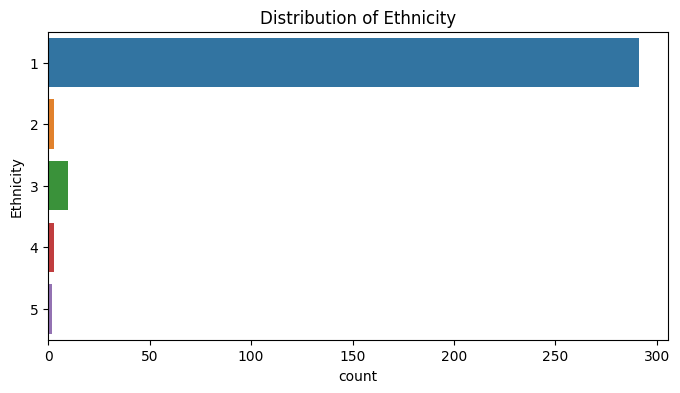

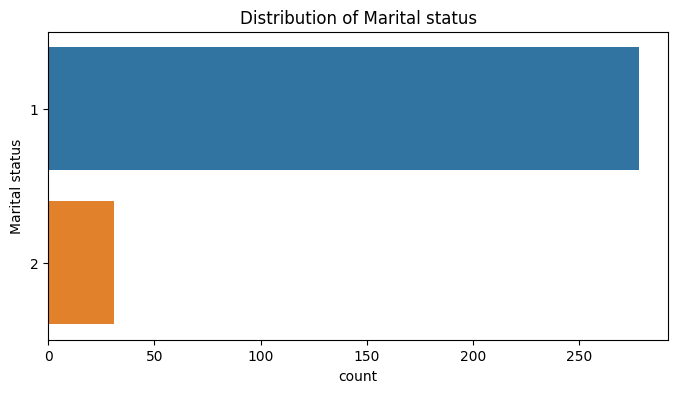

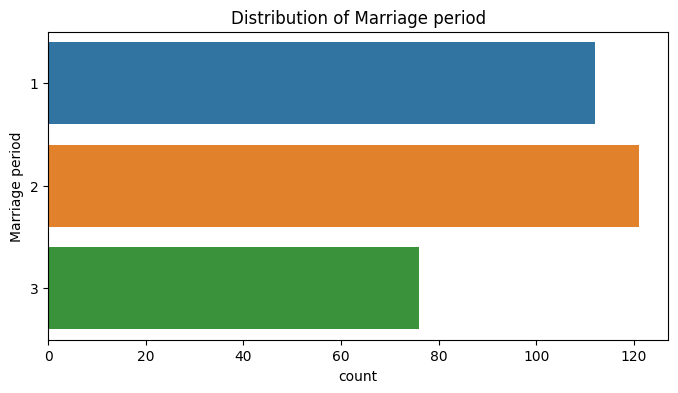

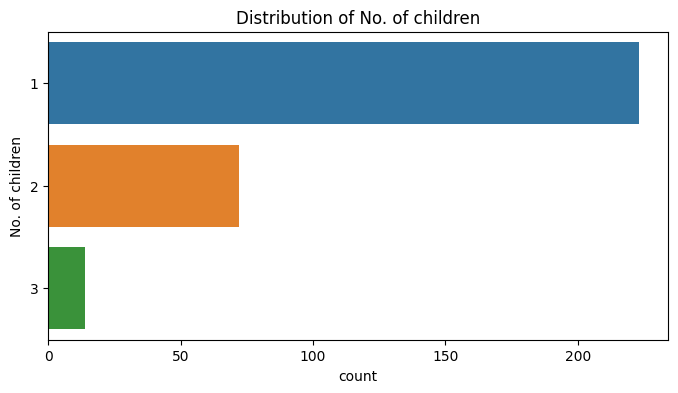

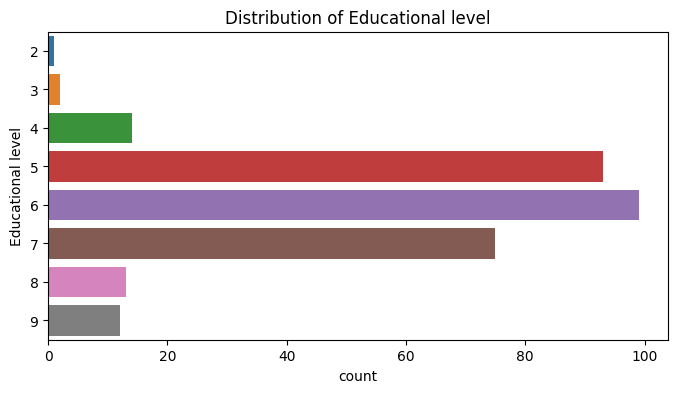

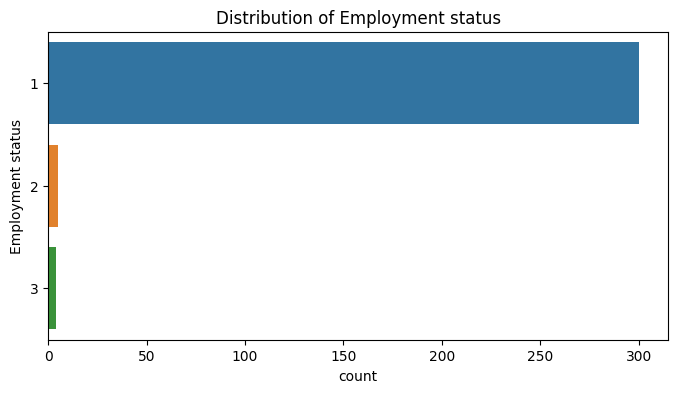

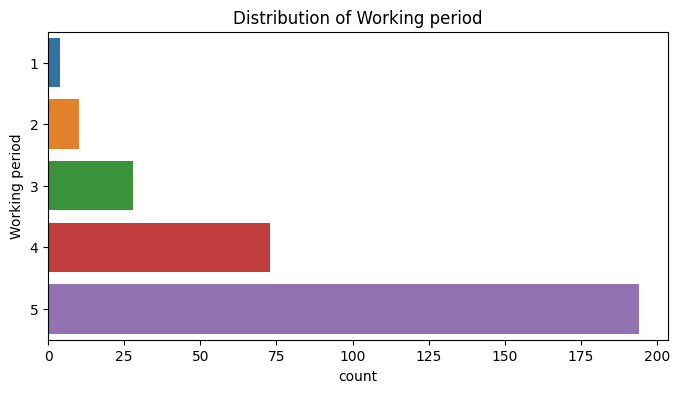

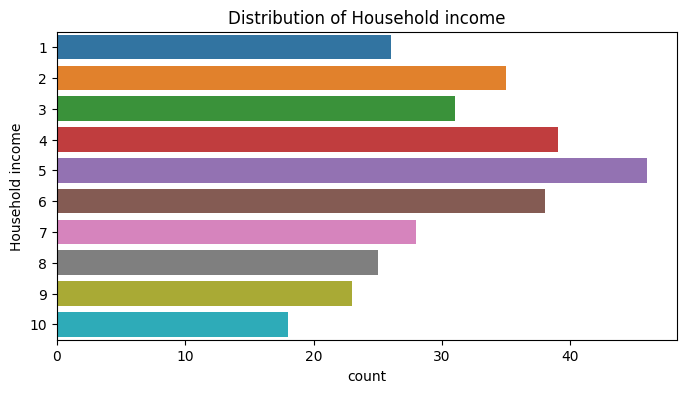

In [4]:
# Numeric feature distributions
df.select_dtypes(include=[np.number]).hist(bins=15, figsize=(15, 10))
plt.suptitle("Distribution of Numeric Features")
plt.show()

# Categorical feature distributions
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()


# 3.2 Null Values

In [5]:
# Check null values percentage
missing_values = df.isnull().sum() / len(df) * 100
print("Percentage of missing values per column:\n", missing_values[missing_values > 0])


Percentage of missing values per column:
 Series([], dtype: float64)


# 3.3 Outliers Detection

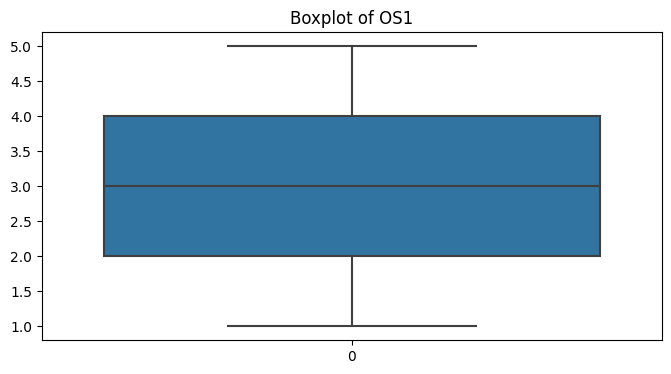

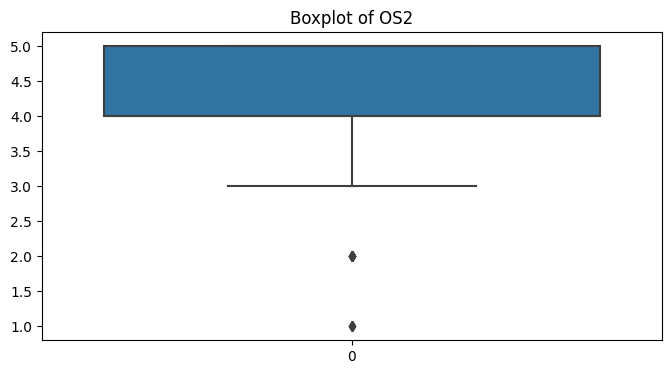

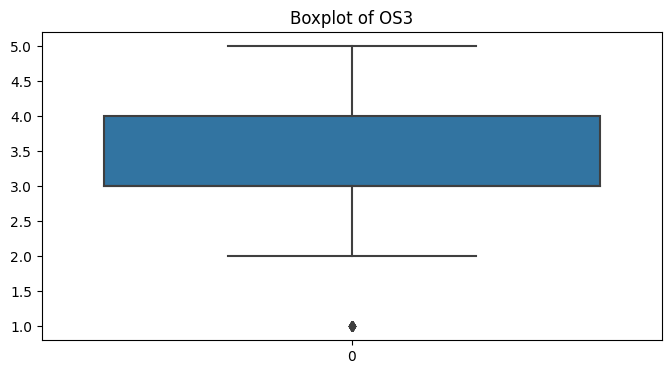

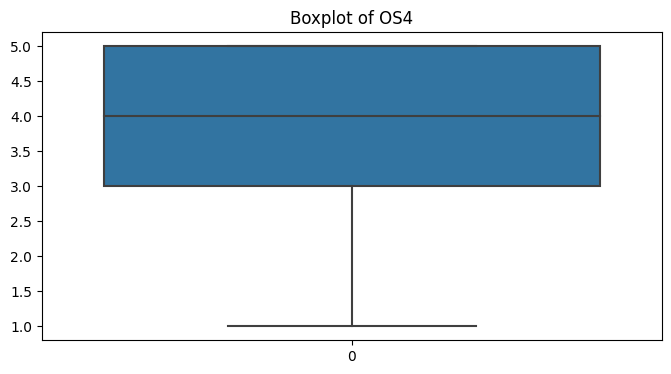

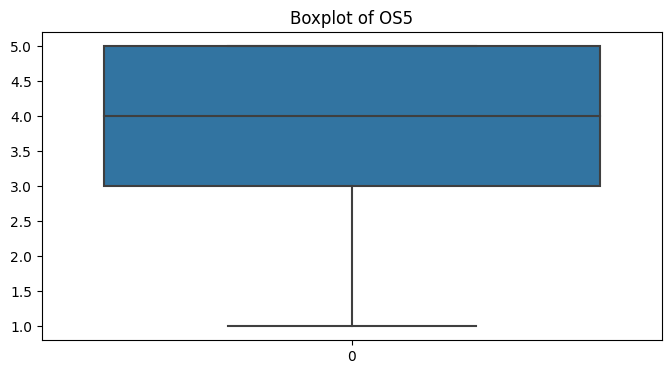

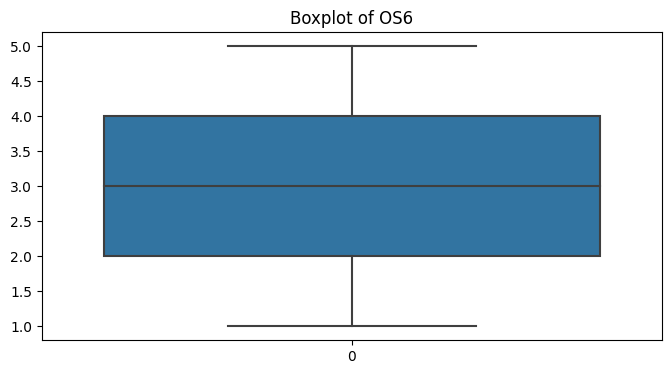

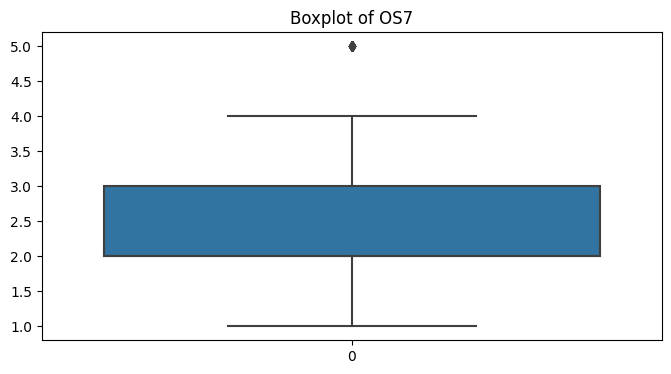

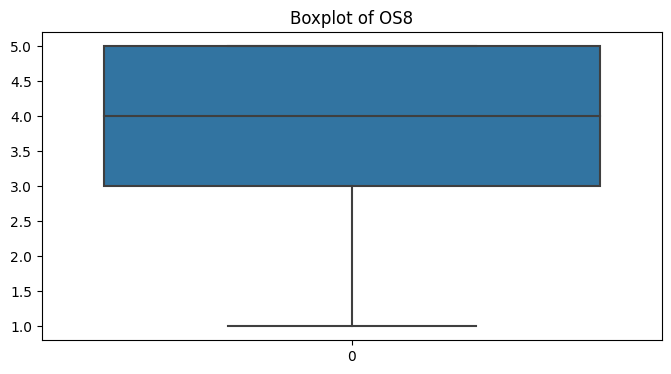

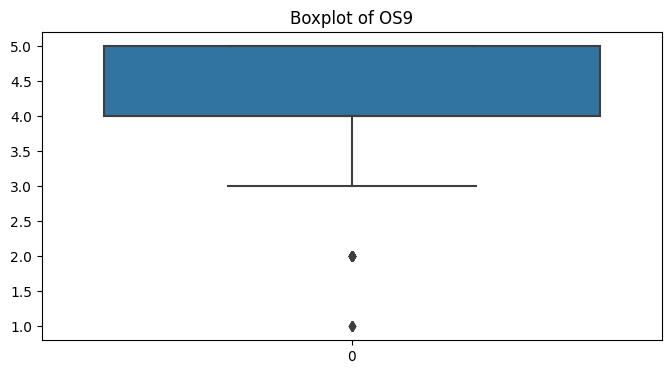

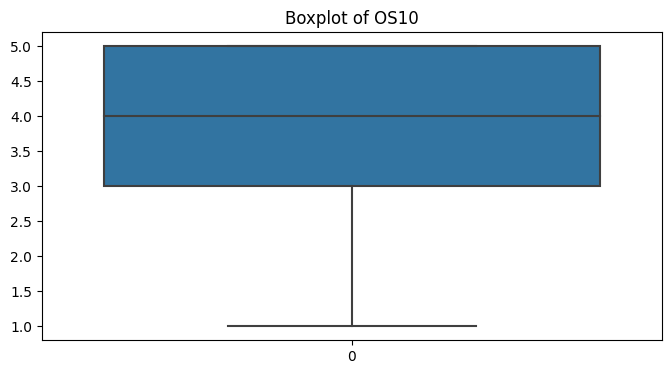

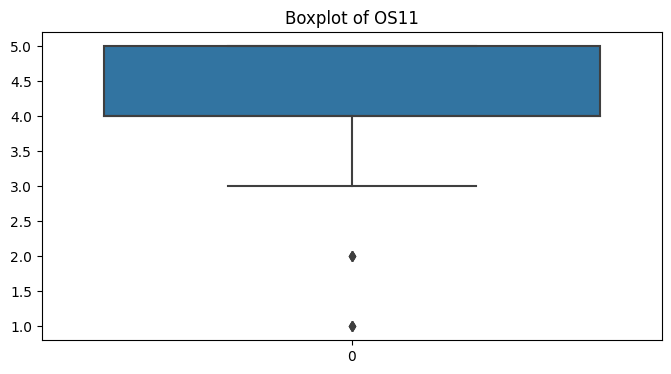

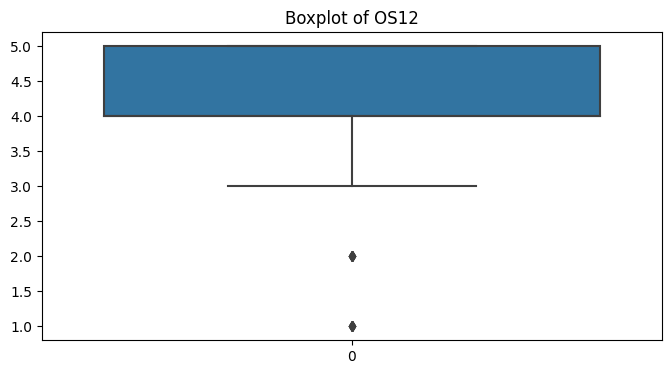

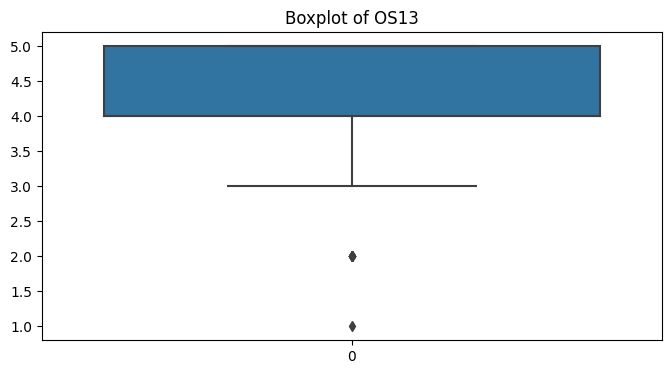

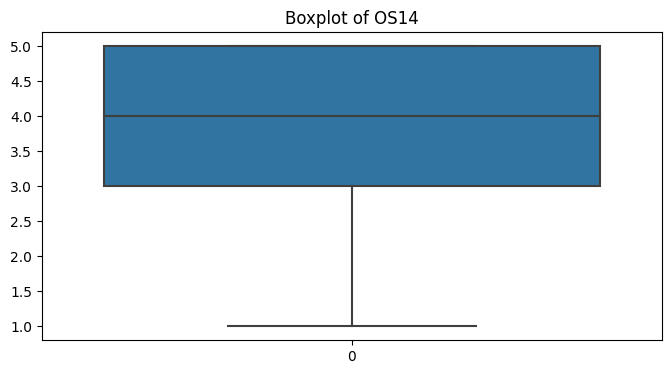

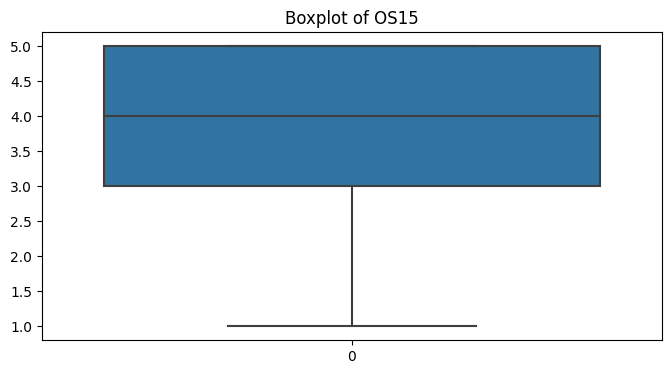

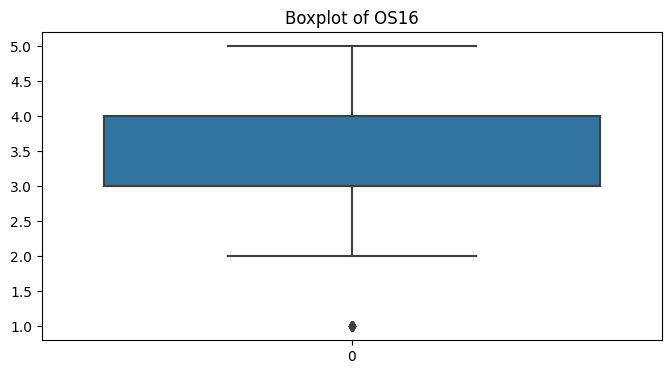

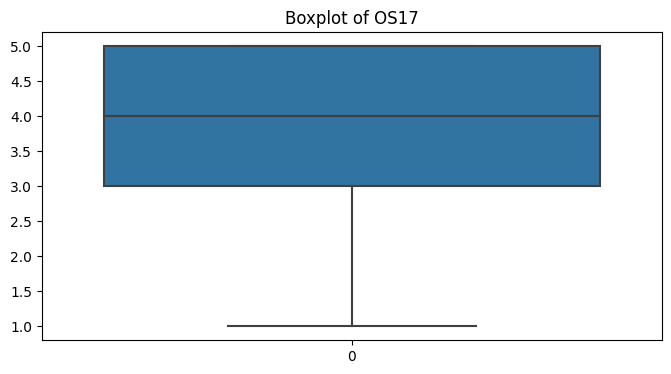

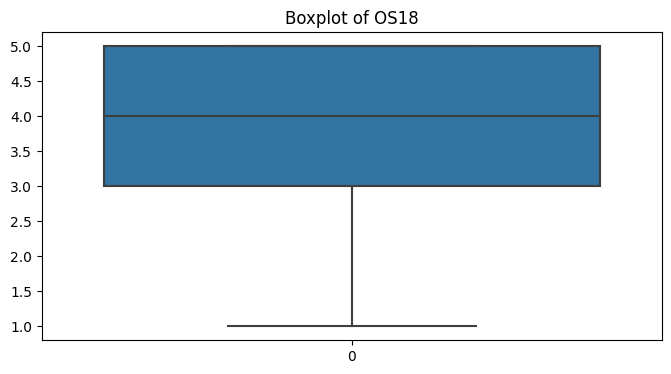

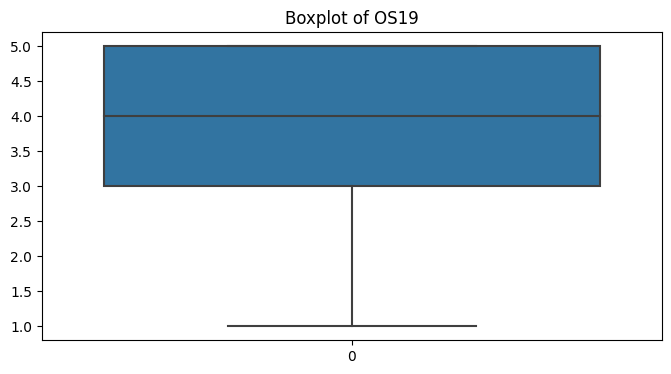

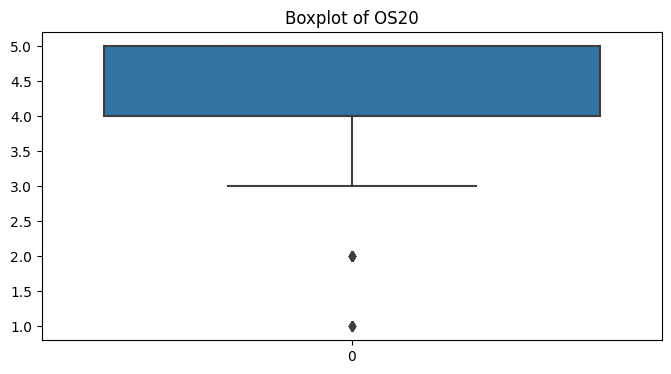

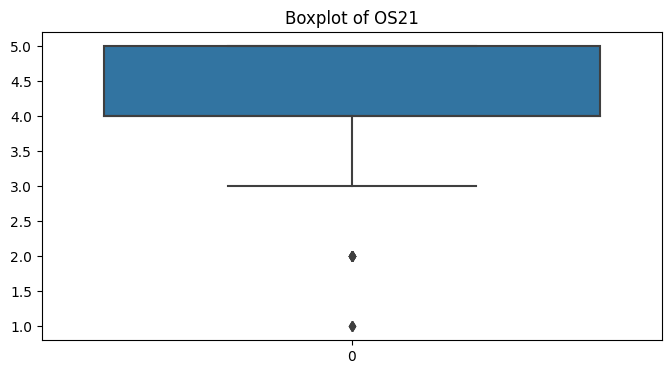

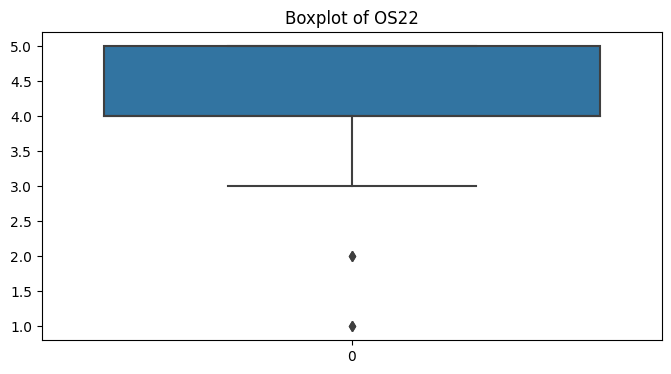

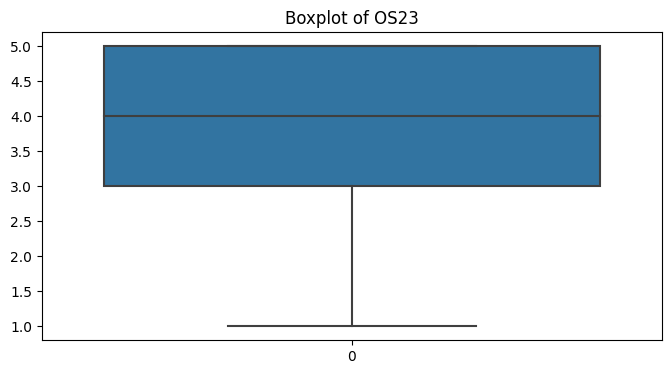

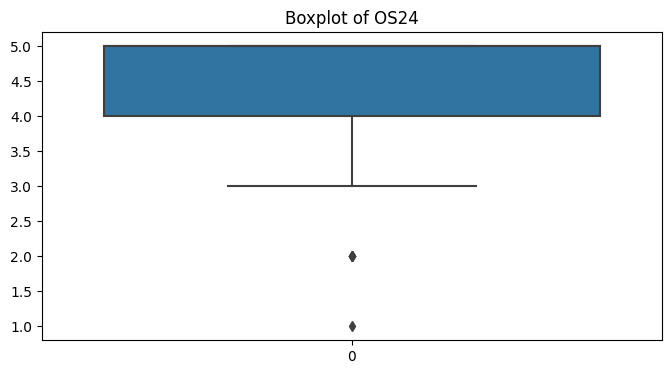

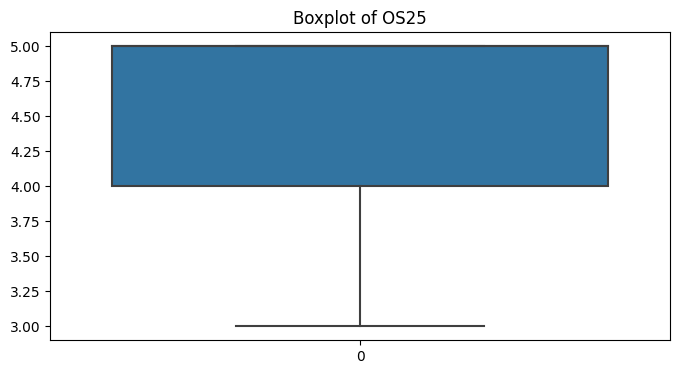

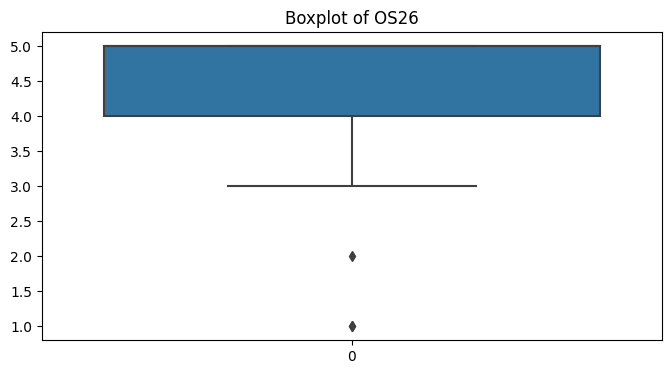

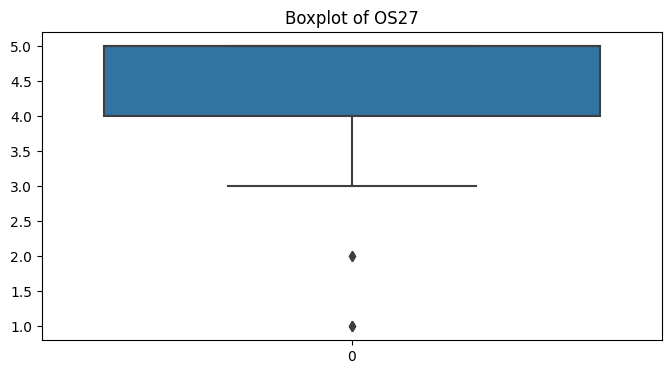

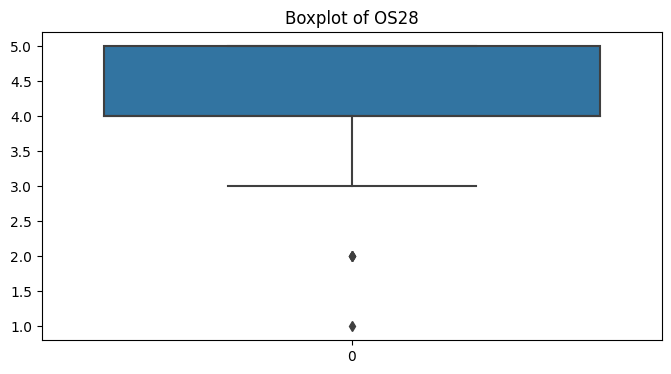

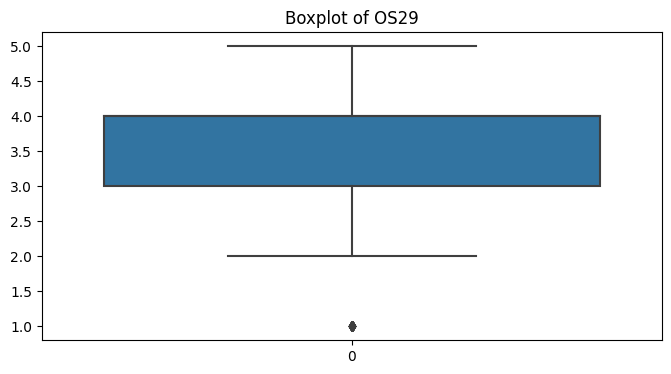

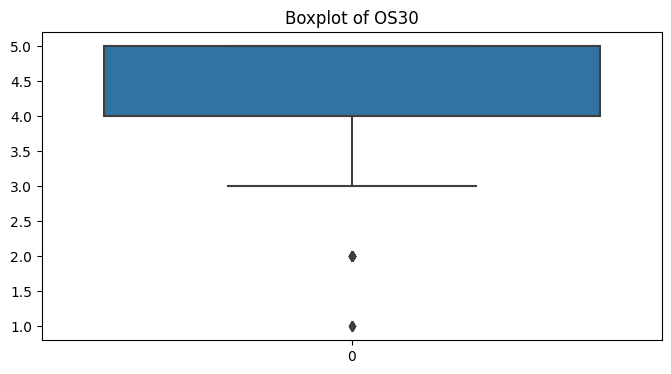

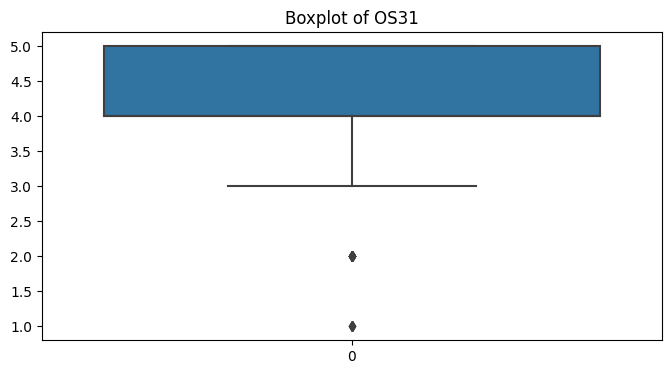

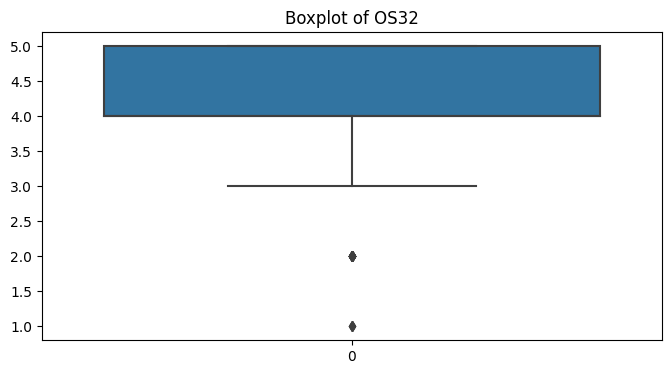

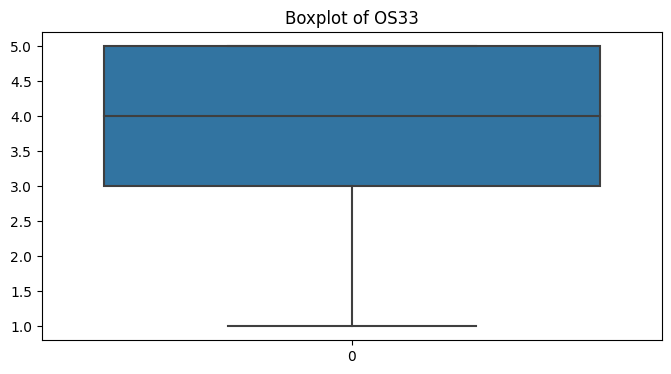

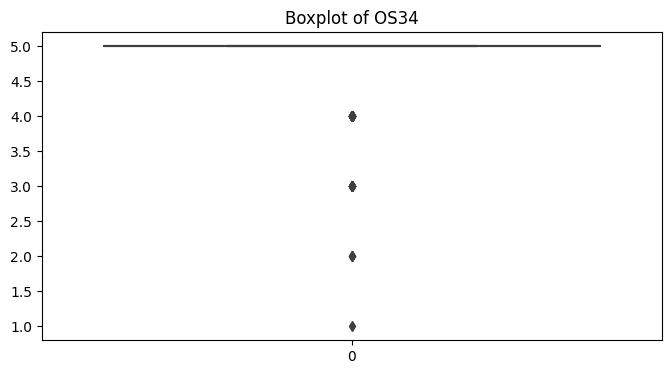

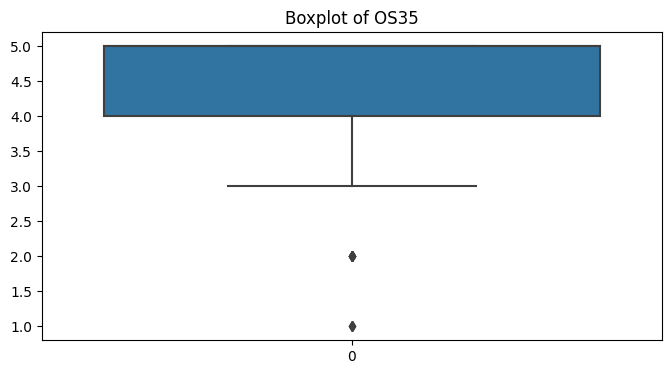

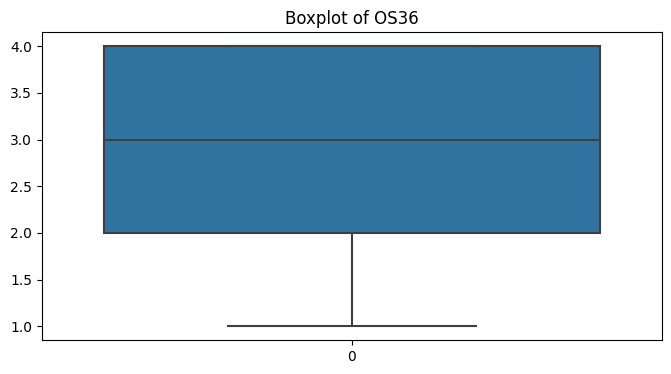

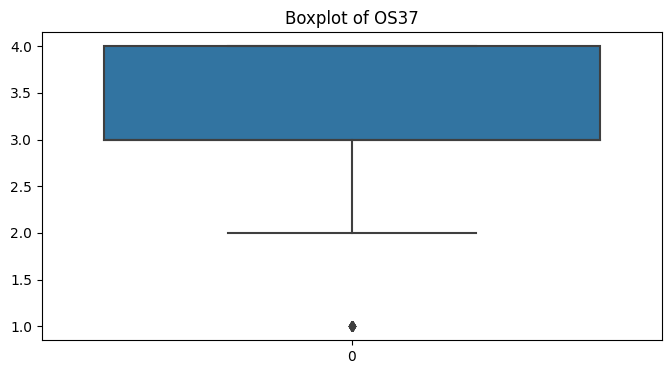

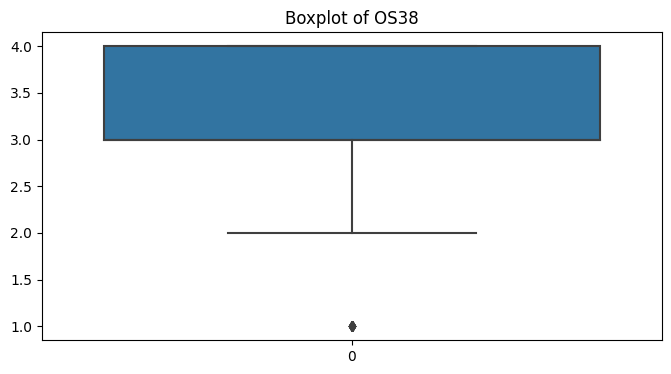

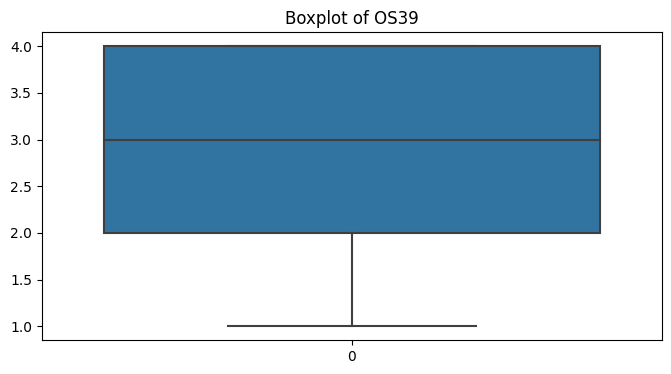

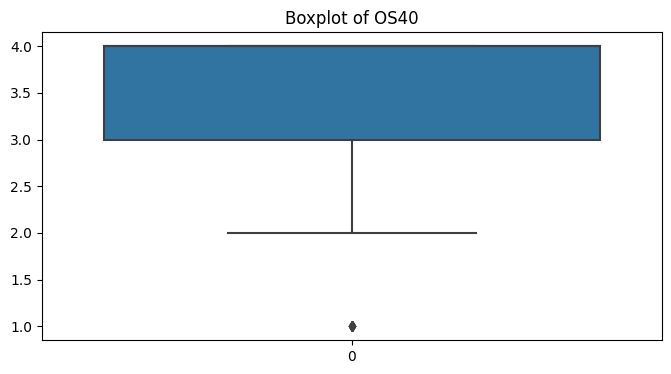

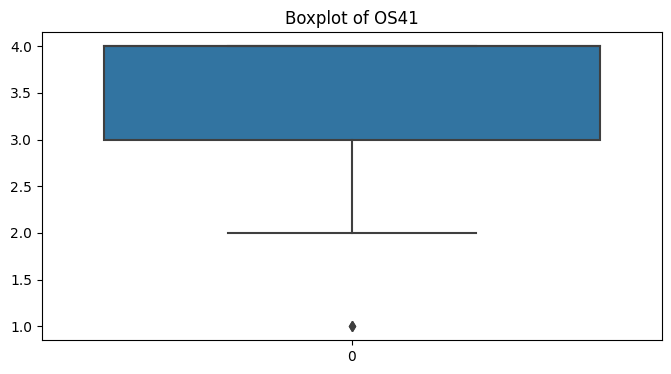

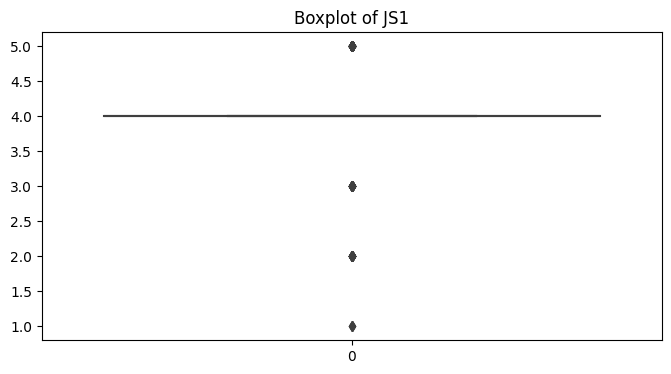

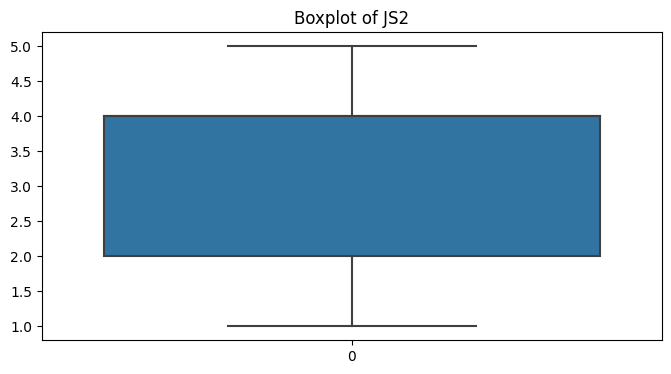

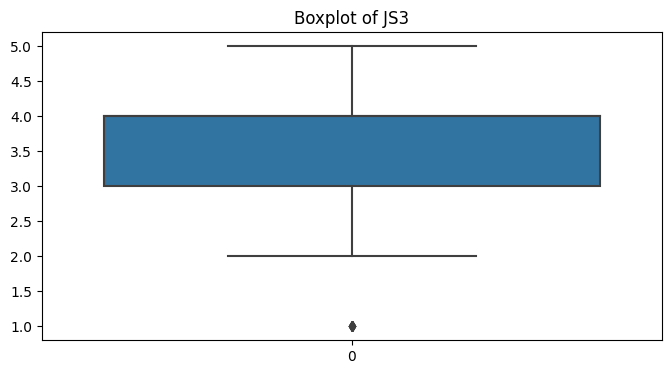

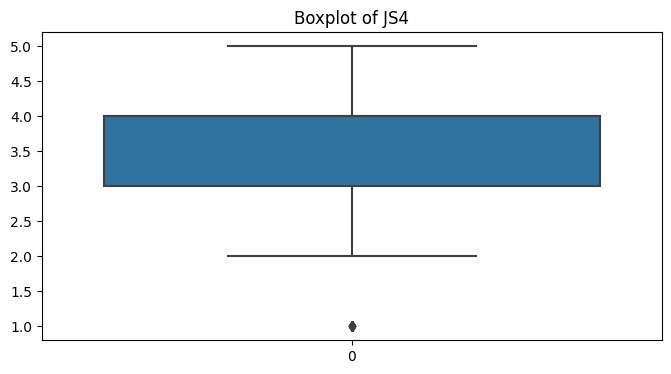

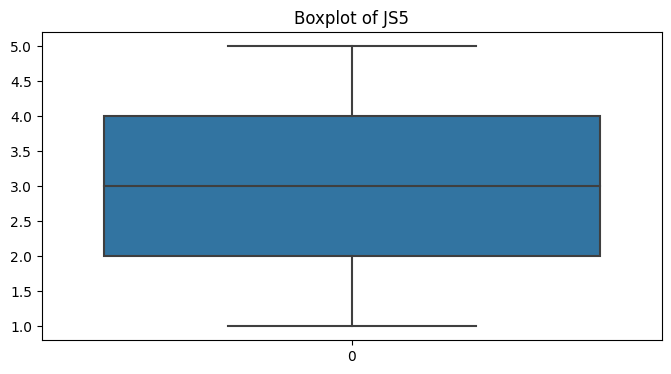

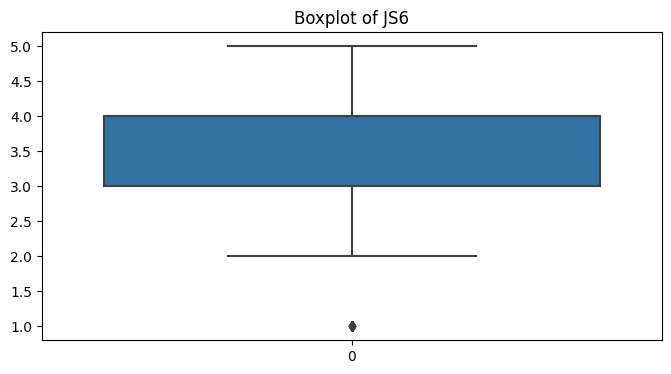

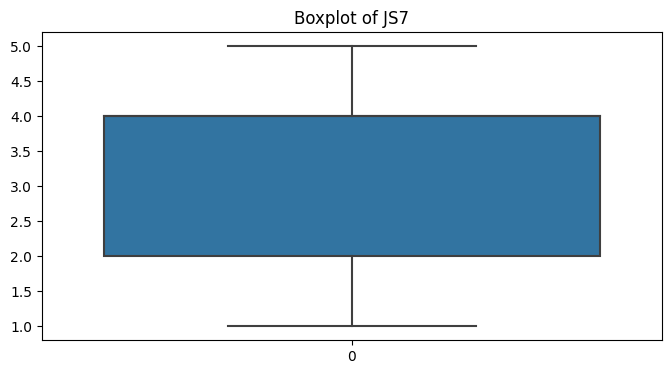

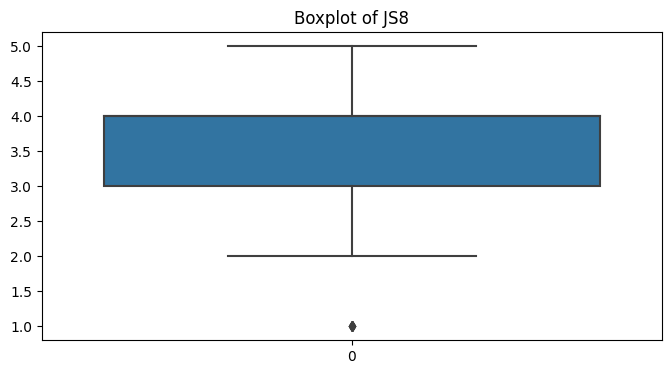

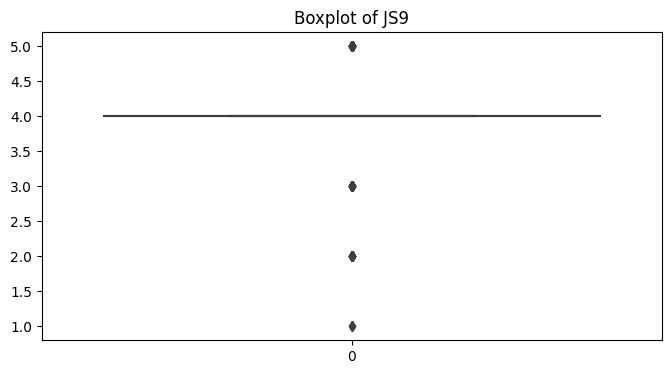

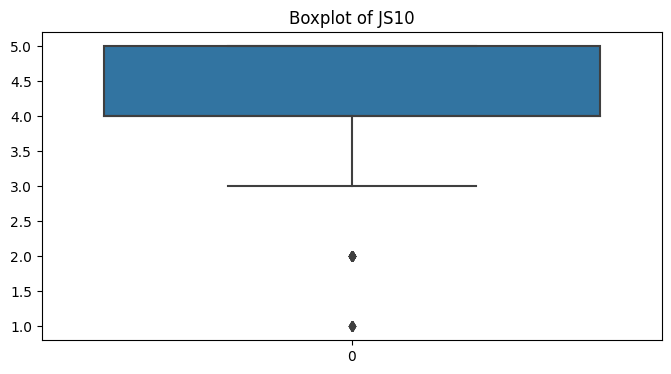

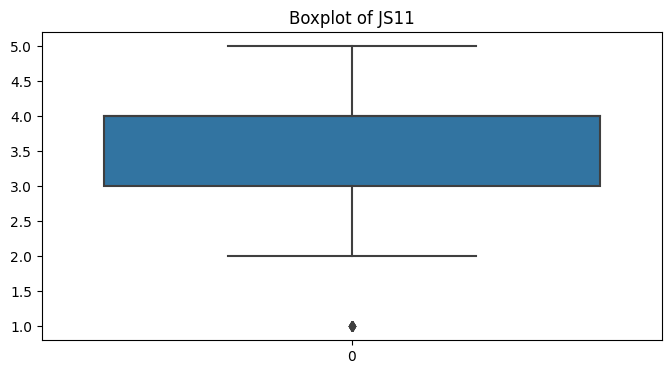

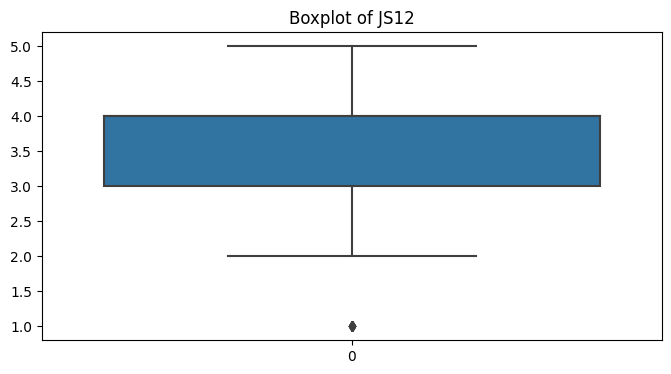

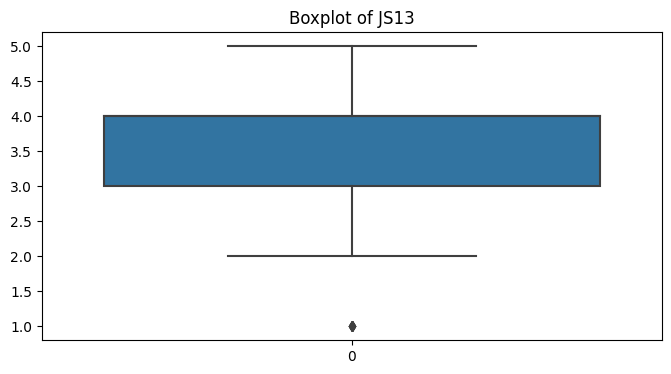

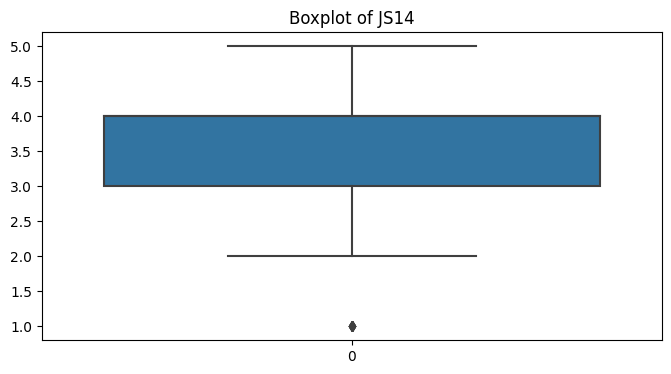

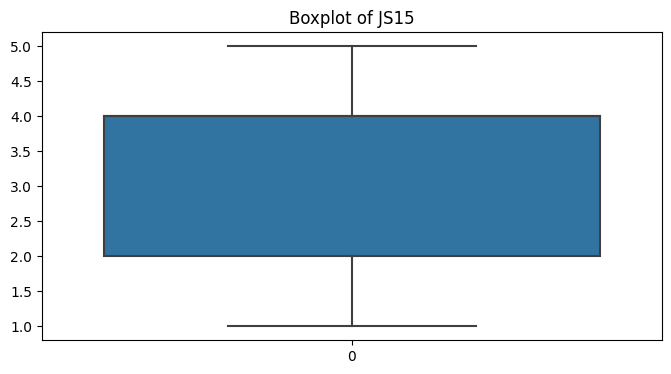

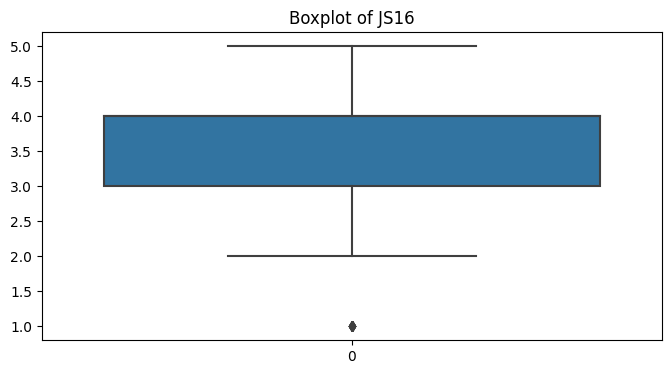

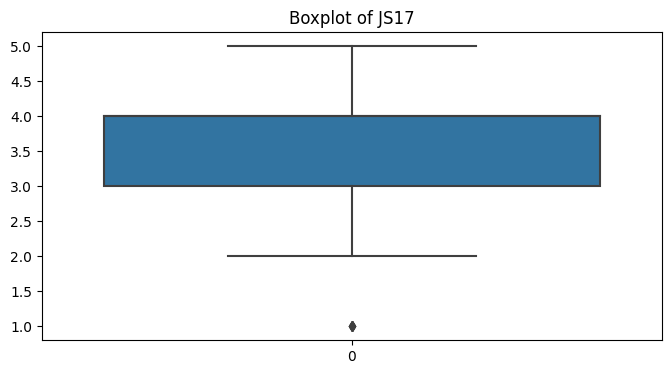

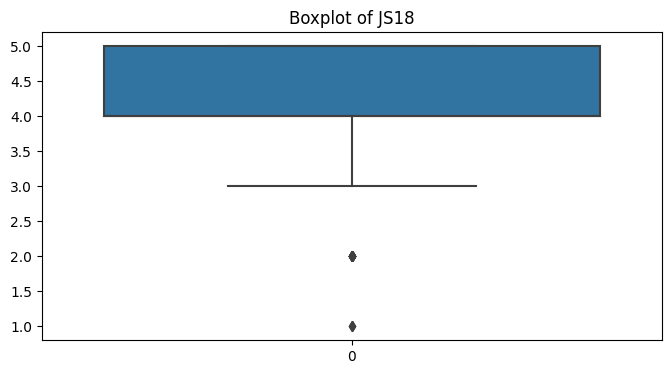

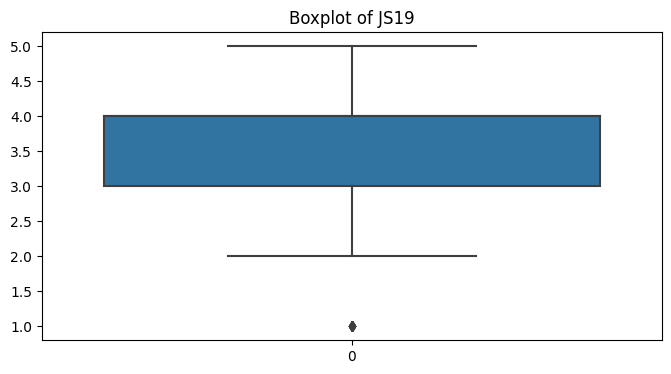

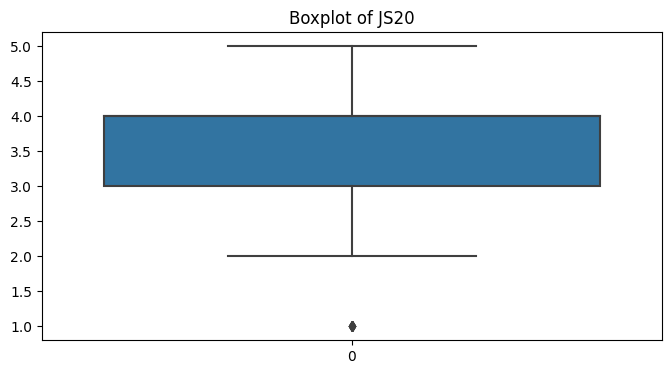

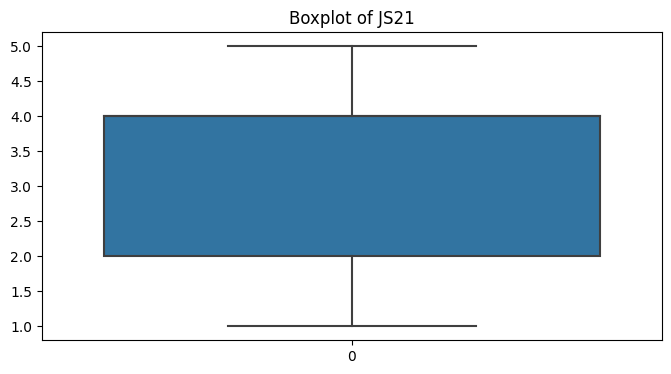

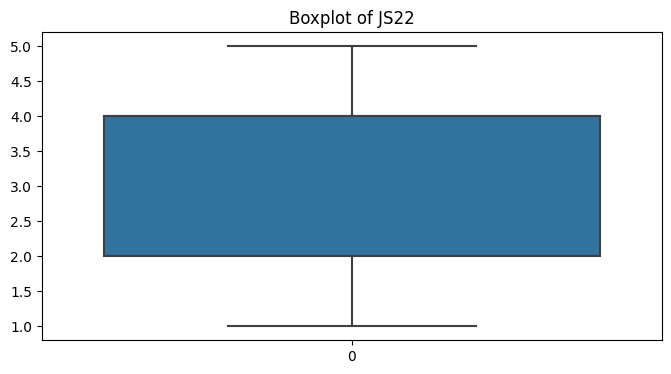

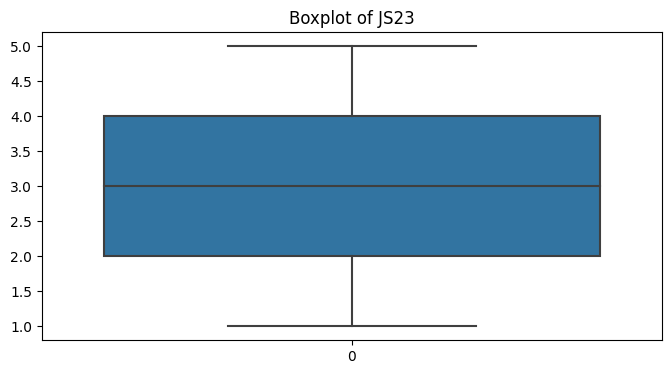

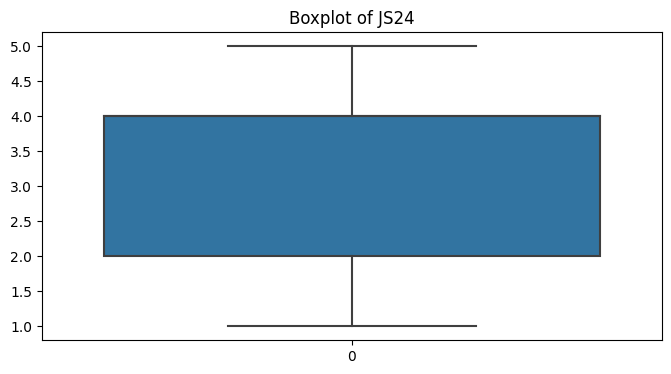

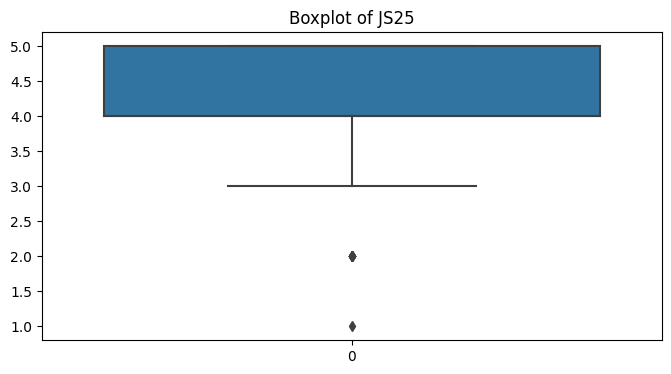

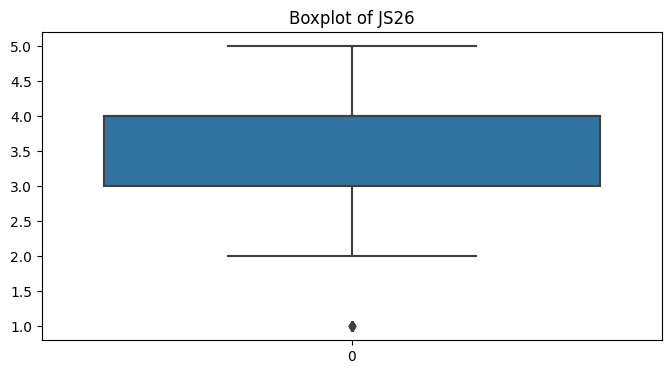

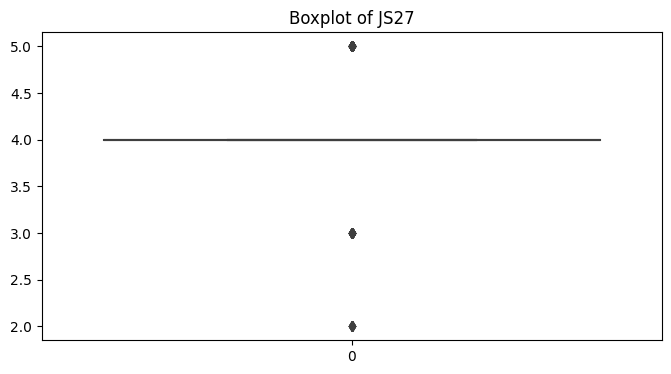

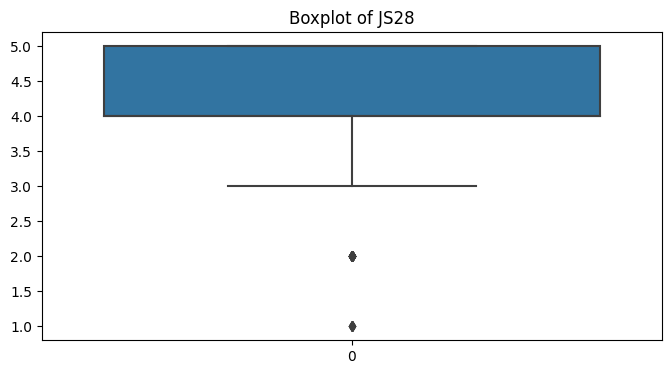

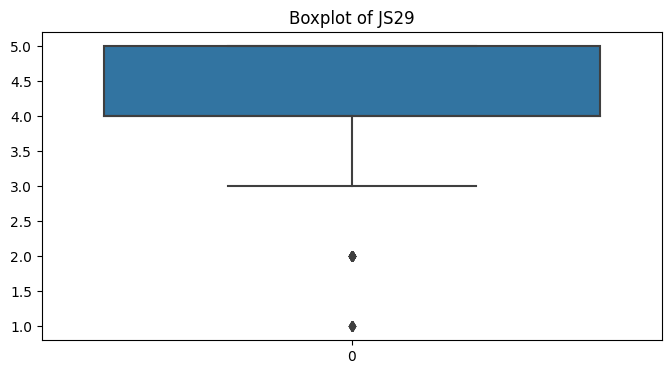

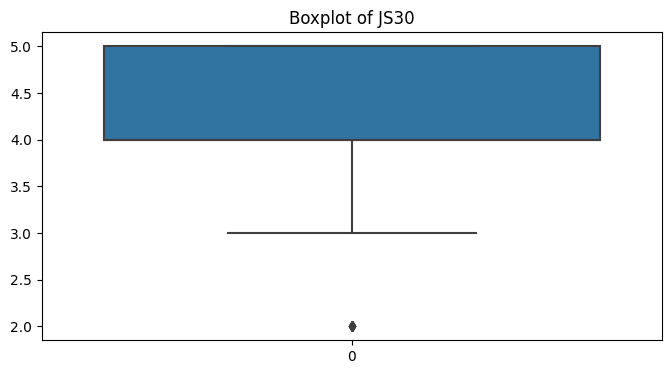

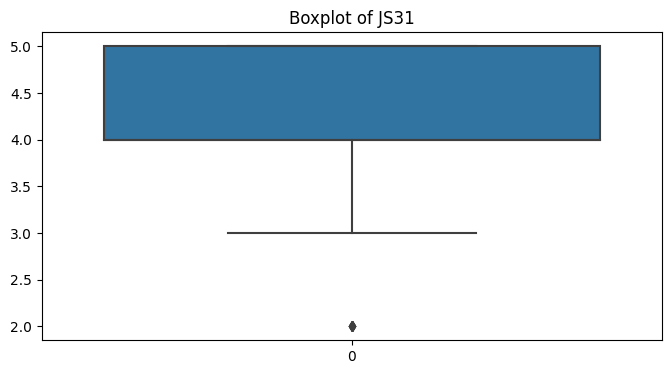

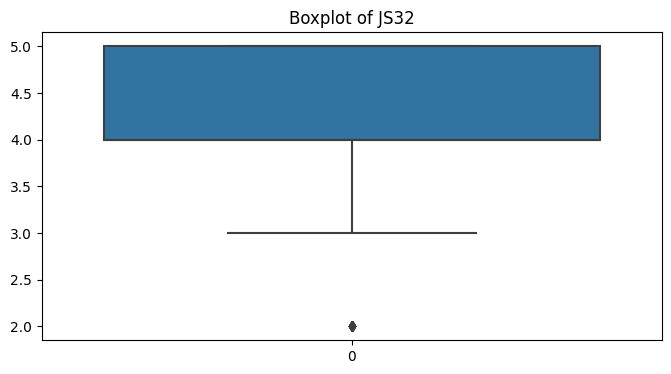

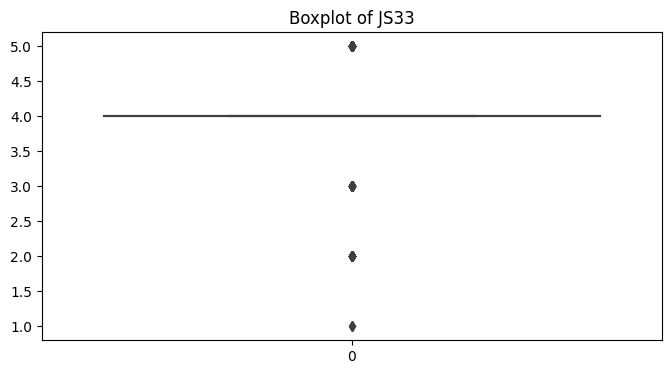

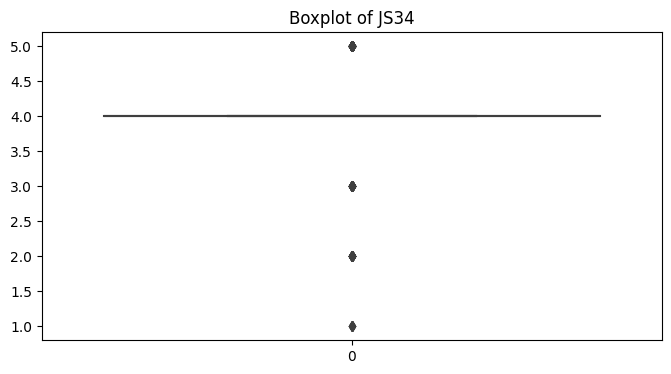

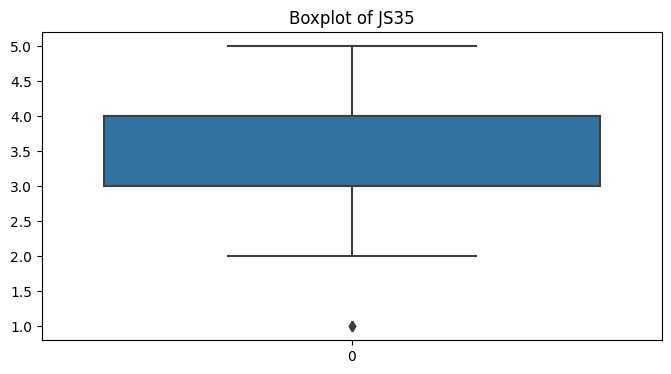

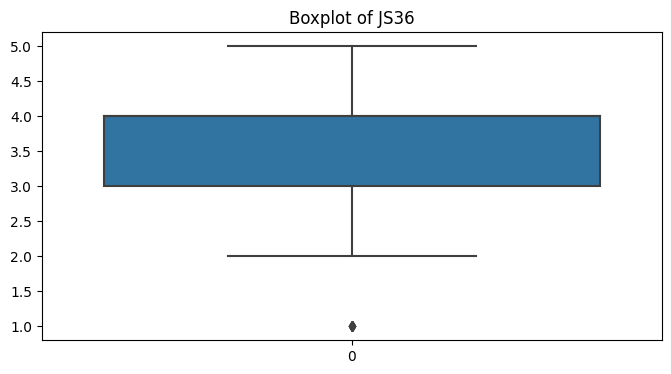

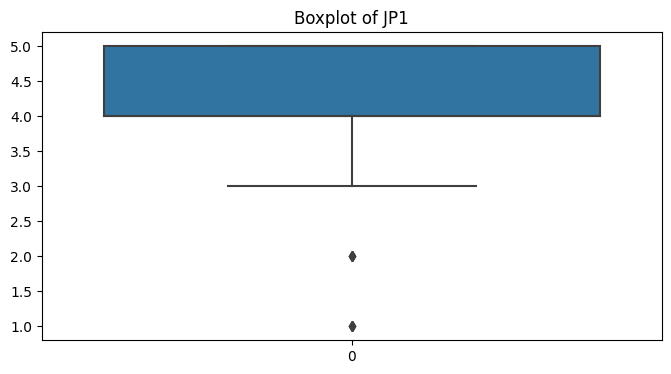

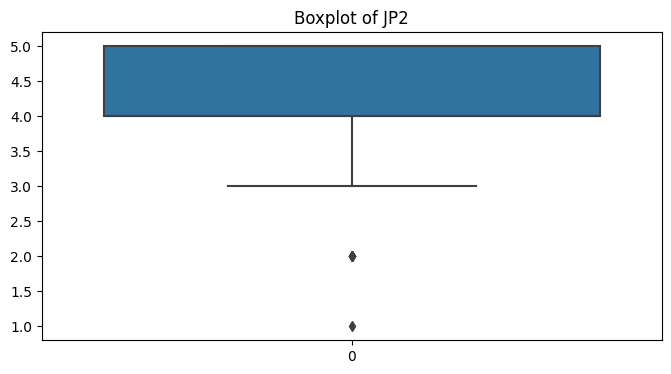

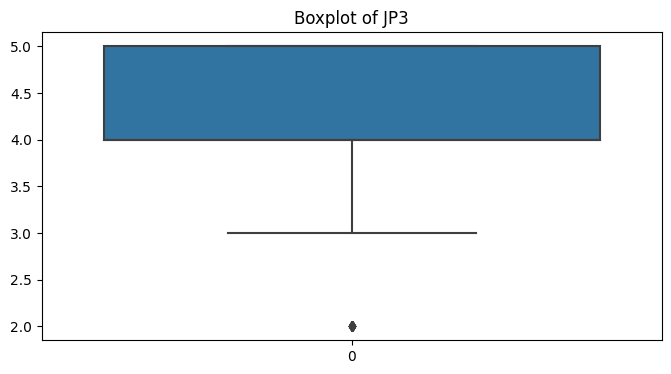

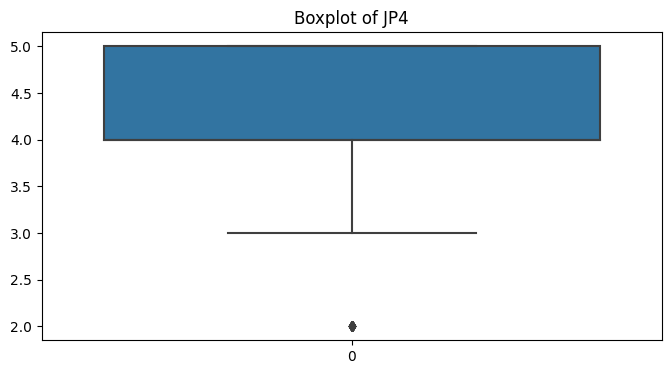

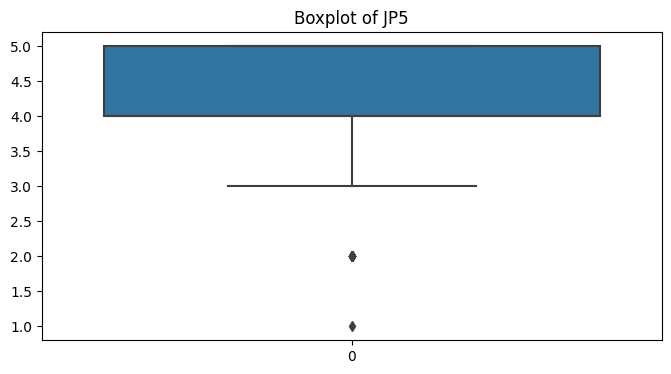

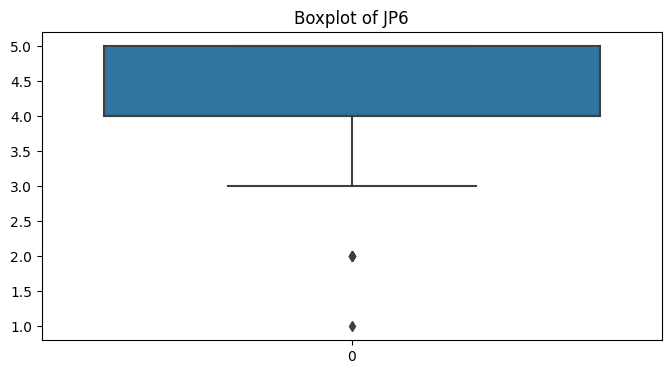

In [6]:
# Outlier detection with box plots
numeric_features = df.select_dtypes(include=[np.number]).columns
for col in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


# 3.4 Pearson’s Correlation

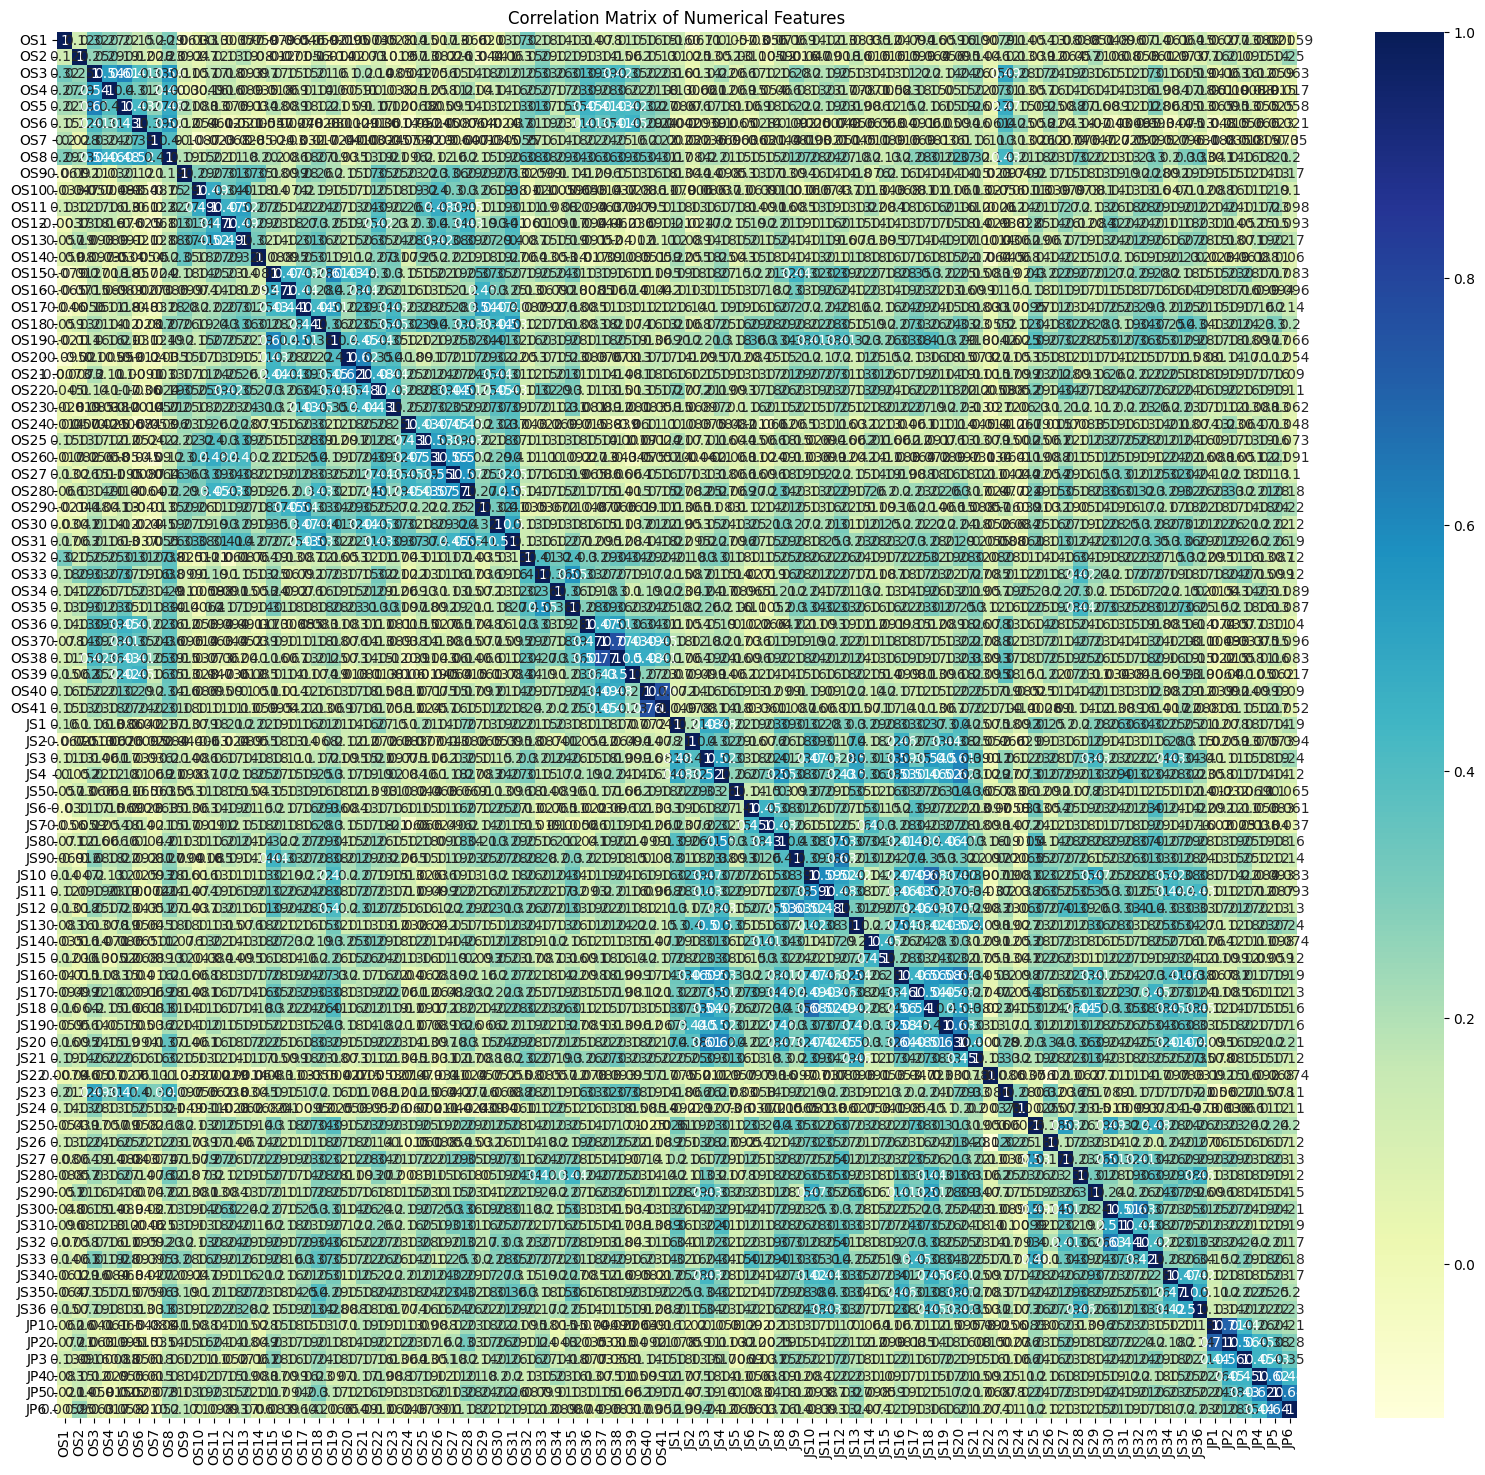

In [7]:
# Correlation matrix for numerical features
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(20, 18))  # Increase the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


# Step 4: Data Description

In [8]:
# Describe numerical features
print(df.describe())

# Describe categorical features
print(df.describe(include=['category']))


              OS1         OS2         OS3         OS4         OS5         OS6  \
count  309.000000  309.000000  309.000000  309.000000  309.000000  309.000000   
mean     3.155340    4.042071    3.472492    3.686084    3.724919    3.022654   
std      1.087926    0.849853    1.082650    1.032822    1.074525    1.174460   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      2.000000    4.000000    3.000000    3.000000    3.000000    2.000000   
50%      3.000000    4.000000    3.000000    4.000000    4.000000    3.000000   
75%      4.000000    5.000000    4.000000    5.000000    5.000000    4.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

              OS7         OS8         OS9        OS10  ...        JS33  \
count  309.000000  309.000000  309.000000  309.000000  ...  309.000000   
mean     2.514563    3.822006    4.019417    3.860841  ...    3.980583   
std      1.115395    1.030714    1.025461    0.9

# Step 5: Data Types and Univariate Analysis


Data Types:
 Age                category
Religion           category
Ethnicity          category
Marital status     category
Marriage period    category
                     ...   
JP2                   int64
JP3                   int64
JP4                   int64
JP5                   int64
JP6                   int64
Length: 94, dtype: object


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


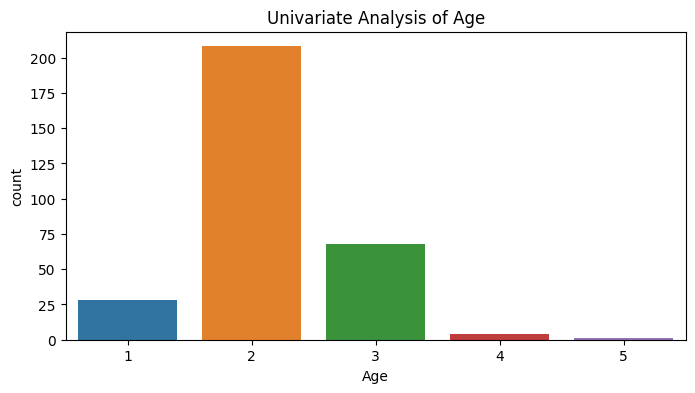

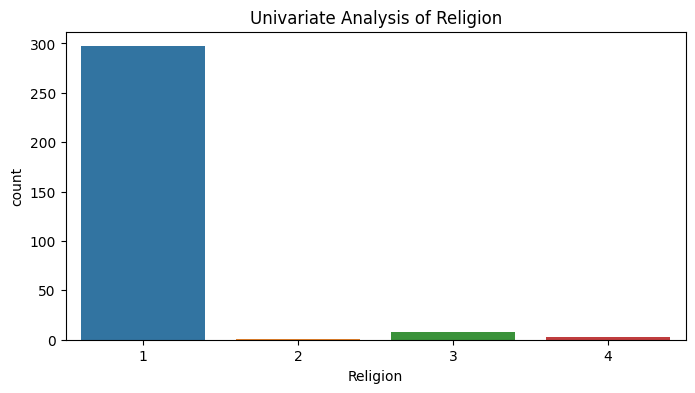

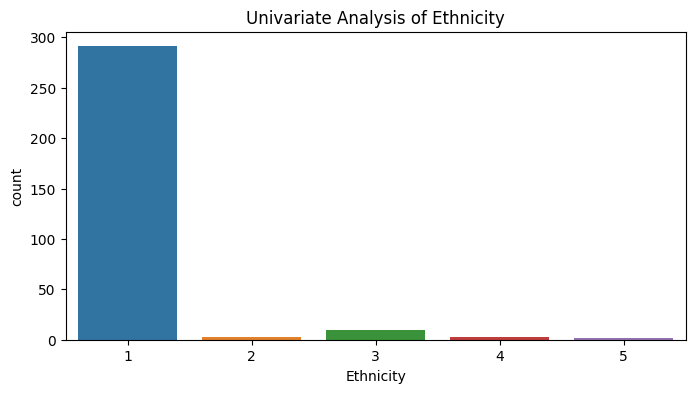

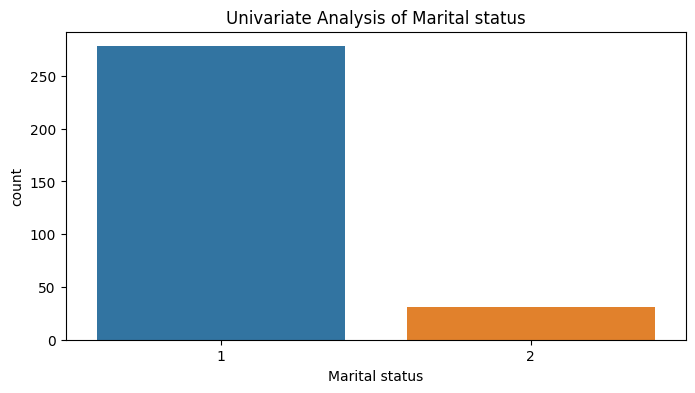

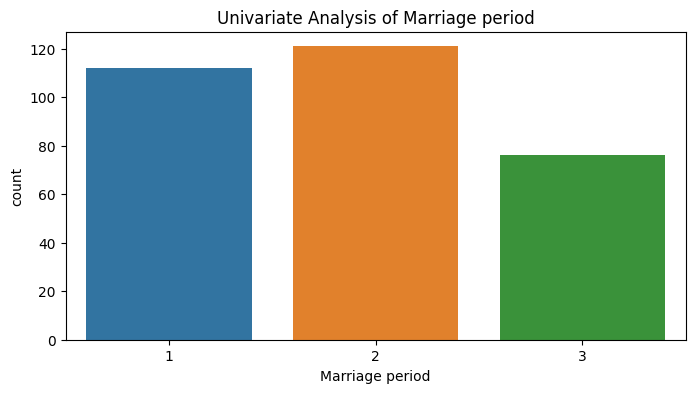

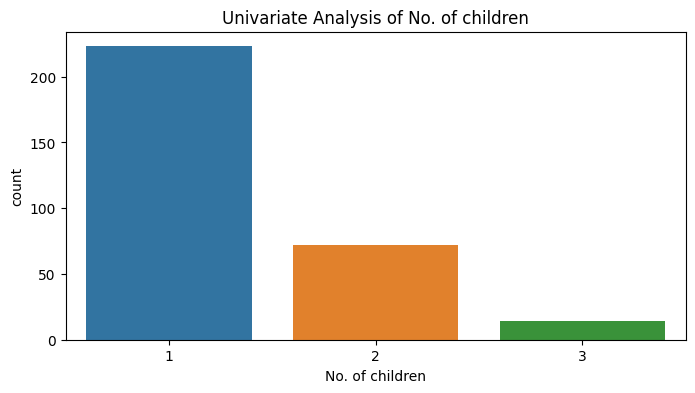

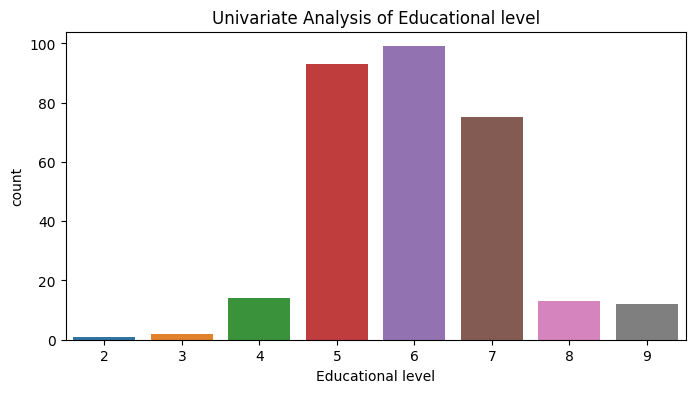

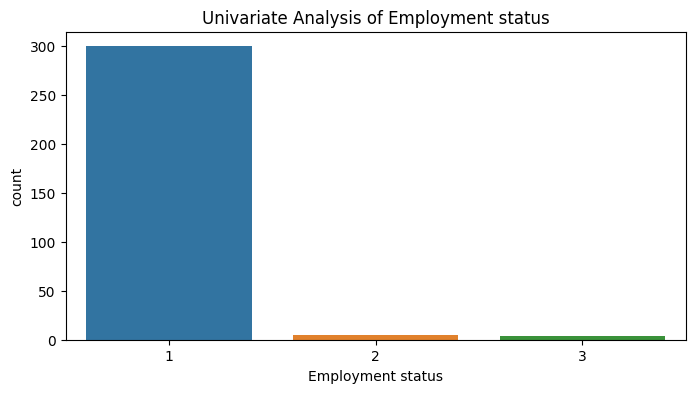

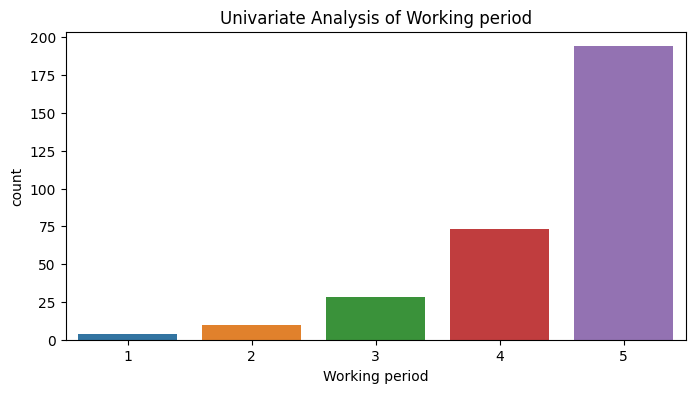

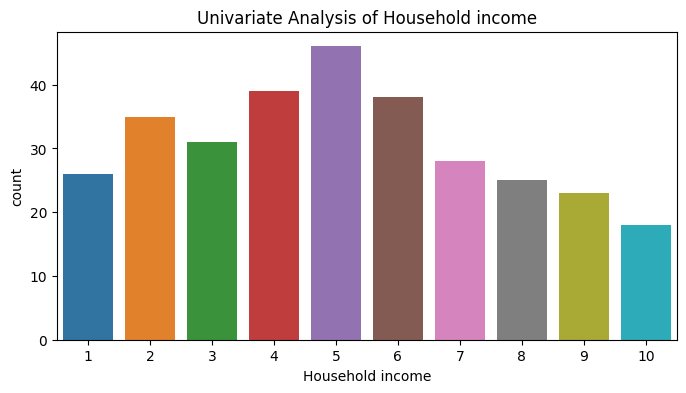

In [9]:
# Display data types
print("Data Types:\n", df.dtypes)

# Univariate analysis for categorical data
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Univariate Analysis of {col}")
    plt.show()


# Step 6: Bivariate Analysis

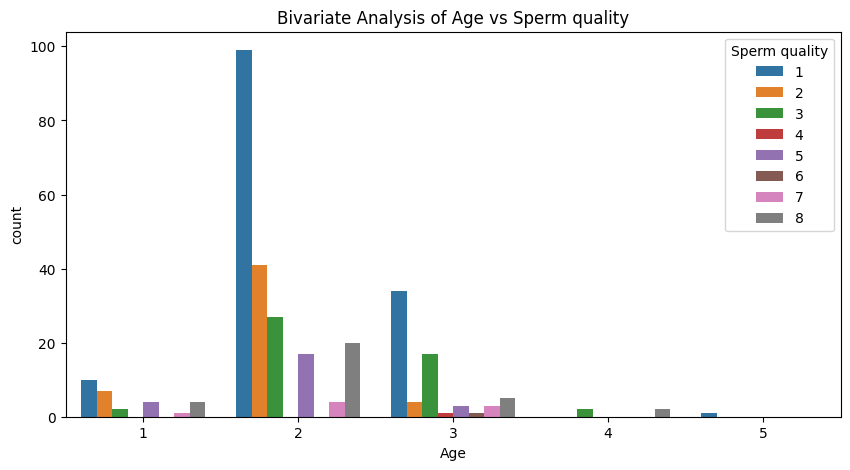

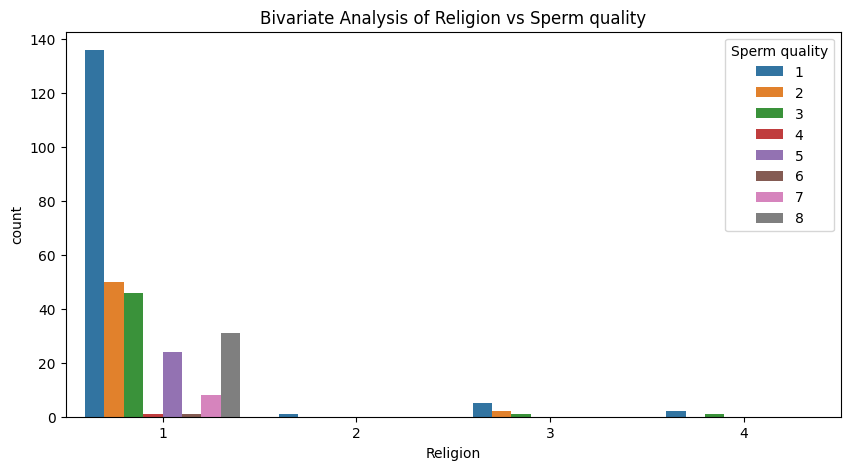

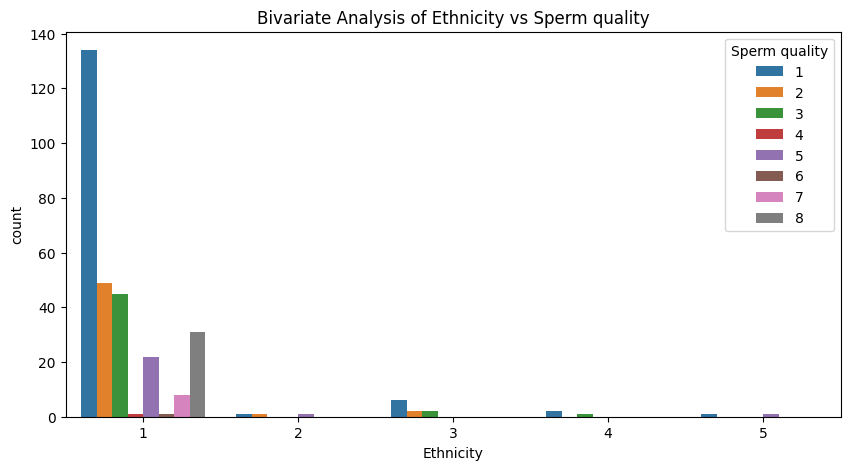

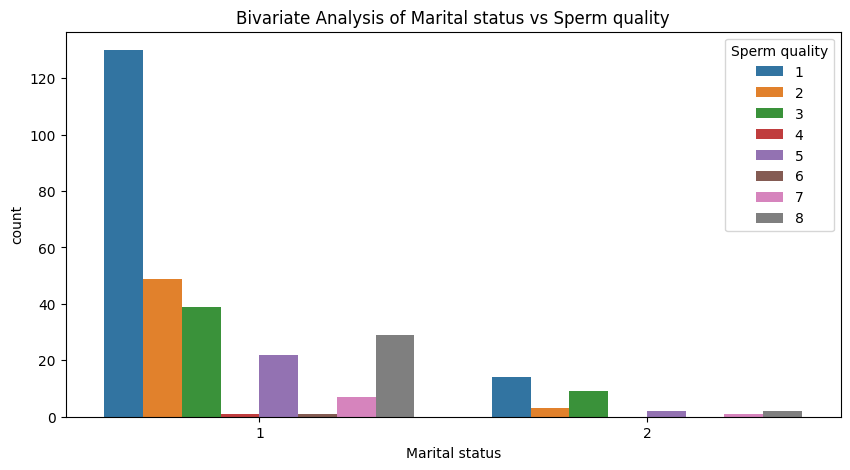

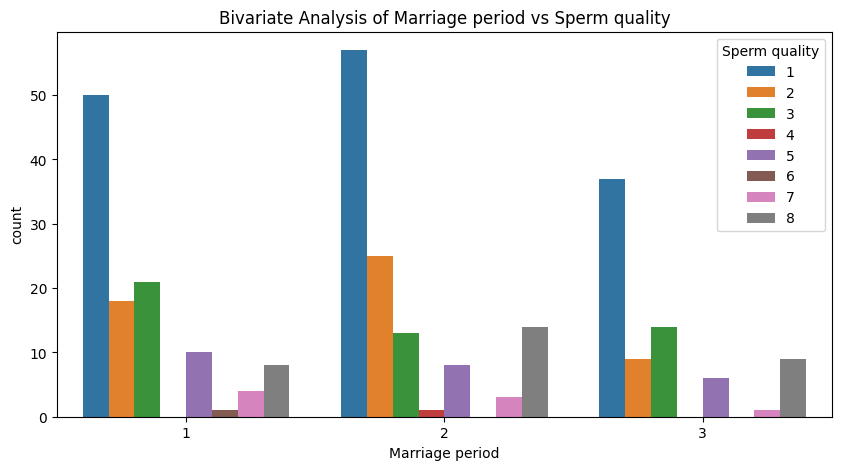

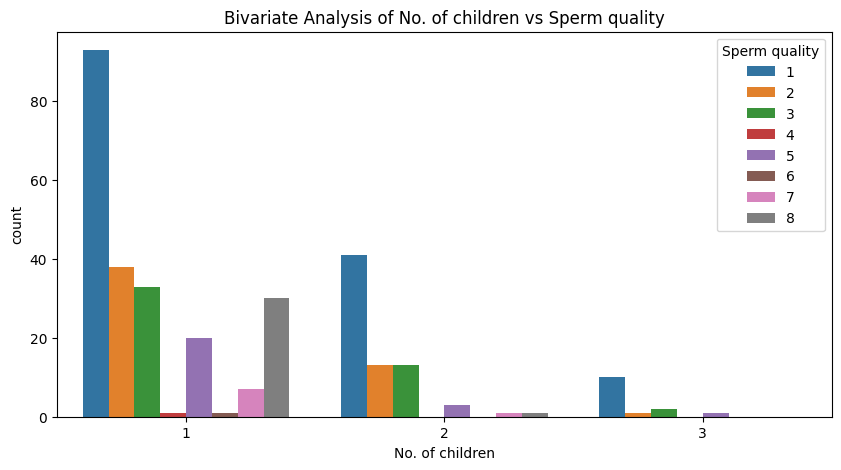

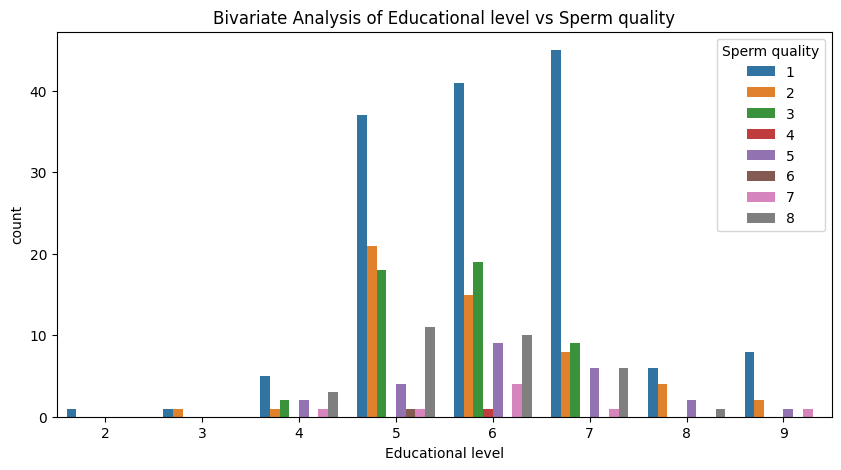

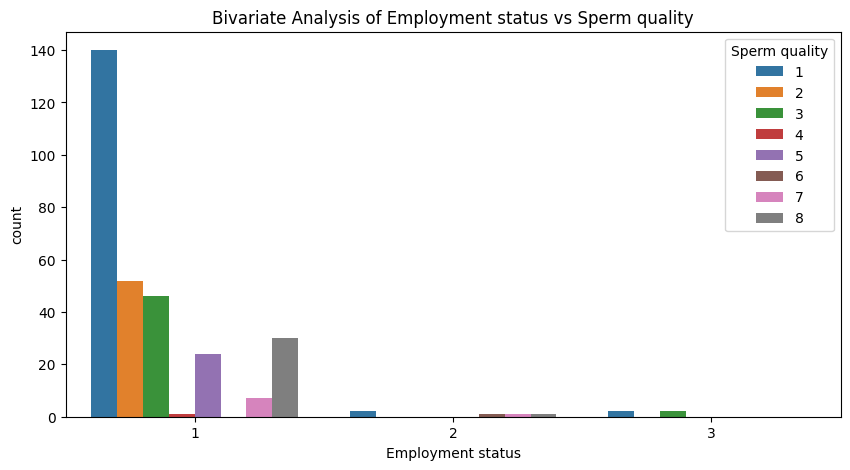

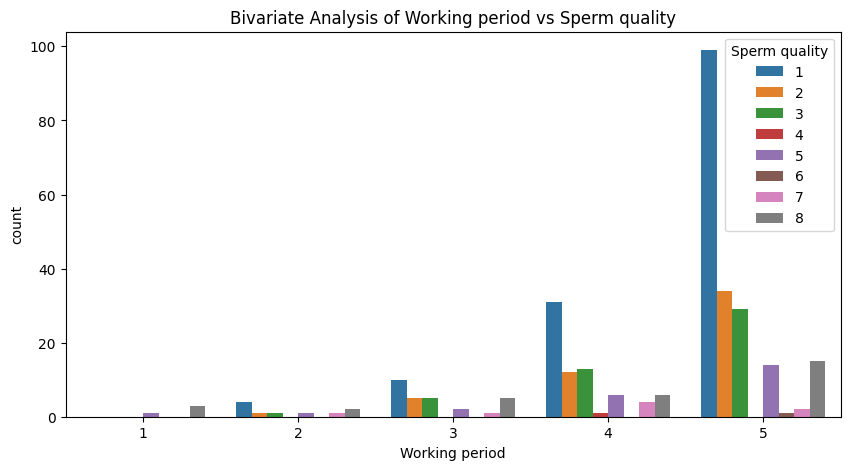

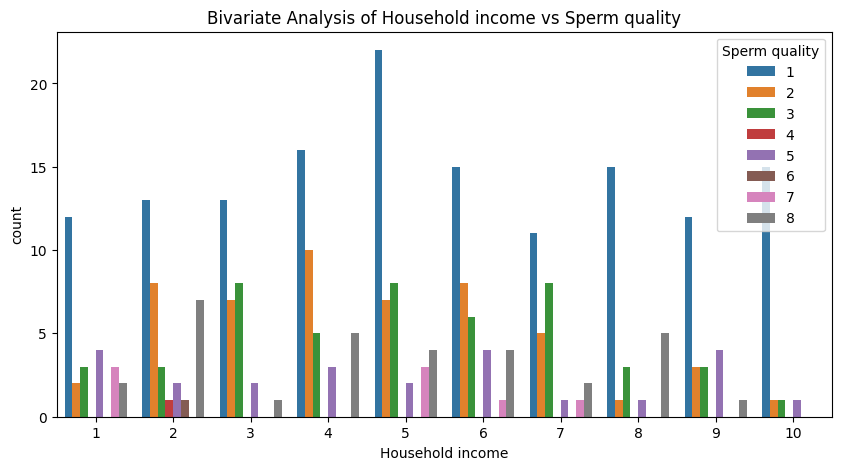

In [10]:
# Bivariate analysis: Categorical vs. Target
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, hue='Sperm quality')
    plt.title(f"Bivariate Analysis of {col} vs Sperm quality")
    plt.show()


# Step 7: Encoding Categorical Data for Model Training)


# One-hot encoding for categorical features


In [11]:
# One-hot encoding for categorical features
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print(df_encoded.head())

  Sperm quality  OS1  OS2  OS3  OS4  OS5  OS6  OS7  OS8  OS9  ...  \
0             3    2    3    3    5    5    3    3    5    5  ...   
1             1    4    5    4    4    4    4    4    5    5  ...   
2             1    3    4    3    4    4    3    2    5    5  ...   
3             1    2    2    3    2    2    2    2    3    5  ...   
4             1    5    5    5    5    3    3    1    3    2  ...   

   Working period_5  Household income_2  Household income_3  \
0             False               False               False   
1             False               False               False   
2              True               False               False   
3              True               False               False   
4             False               False               False   

   Household income_4  Household income_5  Household income_6  \
0               False               False               False   
1                True               False               False   
2          

In [12]:


for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")


Age: 5 unique values
Religion: 4 unique values
Ethnicity: 5 unique values
Marital status: 2 unique values
Marriage period: 3 unique values
No. of children: 3 unique values
Educational level: 8 unique values
Employment status: 3 unique values
Working period: 5 unique values
Household income: 10 unique values
